In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from matplotlib import patheffects
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('DADOS/MICRODADOS_ENEM_2023.csv', encoding='latin1',  delimiter=';')

In [3]:
data.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [4]:
# Listar todas as colunas
data.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

- **NU_INSCRICAO**: Número de inscrição do participante do ENEM.
- **NU_ANO**: Ano de realização do exame.
- **TP_FAIXA_ETARIA**: Faixa etária do participante.
- **TP_SEXO**: Sexo do participante.
- **TP_ESTADO_CIVIL**: Estado civil do participante.
- **TP_COR_RACA**: Cor ou raça do participante.
- **TP_NACIONALIDADE**: Nacionalidade do participante.
- **TP_ST_CONCLUSAO**: Situação de conclusão do Ensino Médio.
- **TP_ANO_CONCLUIU**: Ano de conclusão do Ensino Médio.
- **TP_ESCOLA**: Tipo de escola do Ensino Médio.
- **TP_ENSINO**: Tipo de ensino do Ensino Médio que frequentou.
- **IN_TREINEIRO**: Indica se o participante fez o exame como treineiro (sem valer aprovação).
- **CO_MUNICIPIO_ESC, NO_MUNICIPIO_ESC, CO_UF_ESC, SG_UF_ESC**: Código e nome do município da escola, código e sigla da UF da escola.
- **TP_DEPENDENCIA_ADM_ESC**: Dependência administrativa da escola (federal, estadual, municipal, privada).
- **TP_LOCALIZACAO_ESC**: Localização da escola (urbana ou rural).
- **TP_SIT_FUNC_ESC**: Situação de funcionamento da escola.
- **CO_MUNICIPIO_PROVA, NO_MUNICIPIO_PROVA, CO_UF_PROVA, SG_UF_PROVA**: Código e nome do município de aplicação da prova, código e sigla da UF de aplicação da prova.
- **TP_PRESENCA_CN, TP_PRESENCA_CH, TP_PRESENCA_LC, TP_PRESENCA_MT**: Presença nas provas de Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática.
- **CO_PROVA_CN, CO_PROVA_CH, CO_PROVA_LC, CO_PROVA_MT**: Código das provas de Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática.
- **NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT**: Notas nas provas de Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática.
- **TX_RESPOSTAS_CN, TX_RESPOSTAS_CH, TX_RESPOSTAS_LC, TX_RESPOSTAS_MT**: Texto das respostas do participante em cada prova.
- **TP_LINGUA**: Língua estrangeira escolhida.
- **TX_GABARITO_CN, TX_GABARITO_CH, TX_GABARITO_LC, TX_GABARITO_MT**: Gabarito das provas.
- **TP_STATUS_REDACAO**: Status da redação (corrigida, anulada, etc.).
- **NU_NOTA_COMP1, NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4, NU_NOTA_COMP5**: Notas nas cinco competências da redação.
- **NU_NOTA_REDACAO**: Nota total da redação.
- **Q001 - Q025**: Respostas ao questionário socioeconômico.

In [5]:
# Remover limitador de linha do pandas
pd.set_option('display.max_rows', None)
# Verificar contagem de nulos por coluna
data.isnull().sum()

NU_INSCRICAO                    0
NU_ANO                          0
TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_ESTADO_CIVIL                 0
TP_COR_RACA                     0
TP_NACIONALIDADE                0
TP_ST_CONCLUSAO                 0
TP_ANO_CONCLUIU                 0
TP_ESCOLA                       0
TP_ENSINO                 2594874
IN_TREINEIRO                    0
CO_MUNICIPIO_ESC          2975449
NO_MUNICIPIO_ESC          2975449
CO_UF_ESC                 2975449
SG_UF_ESC                 2975449
TP_DEPENDENCIA_ADM_ESC    2975449
TP_LOCALIZACAO_ESC        2975449
TP_SIT_FUNC_ESC           2975449
CO_MUNICIPIO_PROVA              0
NO_MUNICIPIO_PROVA              0
CO_UF_PROVA                     0
SG_UF_PROVA                     0
TP_PRESENCA_CN                  0
TP_PRESENCA_CH                  0
TP_PRESENCA_LC                  0
TP_PRESENCA_MT                  0
CO_PROVA_CN               1241528
CO_PROVA_CH               1111312
CO_PROVA_LC   

# Removendo colunas desnecessárias

In [6]:
# Remover TP_ENSINO pois tem muitos nulos
data = data.drop(columns=['TP_ENSINO'])

# Remover CO_MUNICIPIO_ESC e NO_MUNICIPIO_ESC
data = data.drop(columns=['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC'])

# Remover CO_UF_ESC e SG_UF_ESC
data = data.drop(columns=['CO_UF_ESC', 'SG_UF_ESC'])

# Remover TP_DEPENDENCIA_ADM_ESC, TP_LOCALIZACAO_ESC, TP_SIT_FUNC_ESC
data = data.drop(columns=['TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC'])

# Remover TP_ST_CONCLUSAO
data = data.drop(columns=['TP_ST_CONCLUSAO'])

# Remover TP_ANO_CONCLUIU
data = data.drop(columns=['TP_ANO_CONCLUIU'])

# Mapeando valores

In [7]:
# Dicionário de mapeamento de faixas etárias
faixa_etaria_map = {
    1: 'Menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: 'Entre 26 e 30 anos',
    12: 'Entre 31 e 35 anos',
    13: 'Entre 36 e 40 anos',
    14: 'Entre 41 e 45 anos',
    15: 'Entre 46 e 50 anos',
    16: 'Entre 51 e 55 anos',
    17: 'Entre 56 e 60 anos',
    18: 'Entre 61 e 65 anos',
    19: 'Entre 66 e 70 anos',
    20: 'Maior de 70 anos'
}

data['Faixa_Etaria_Desc'] = data['TP_FAIXA_ETARIA'].map(faixa_etaria_map)

In [8]:
# Dicionário de mapeamento para cor ou raça
cor_raca_map = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
    6: 'Não dispõe da informação'
}

data['Cor_Raca_Desc'] = data['TP_COR_RACA'].map(cor_raca_map)

In [9]:
data['TP_ESCOLA'].unique()

array([1, 2, 3], dtype=int64)

In [10]:
# Dicionário de mapeamento para tipo de escola
tipo_escola_map = {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada'
}

data['Tipo_Escola_Desc'] = data['TP_ESCOLA'].map(tipo_escola_map)

In [11]:
# Dicionário de mapeamento para Q001
q001_map = {
    'A': 'Pai - Nunca estudou',
    'B': 'Pai - Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Pai - Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Pai - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Pai - Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Pai - Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Pai - Completou a Pós-graduação',
    'H': 'Pai - Não sei'
}

data['Q001_Desc'] = data['Q001'].map(q001_map)

In [12]:
# Dicionário de mapeamento para Q002
q002_map = {
    'A': 'Mãe - Nunca estudou',
    'B': 'Mãe - Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Mãe - Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Mãe - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Mãe - Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Mãe - Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Mãe - Completou a Pós-graduação',
    'H': 'Mãe - Não sei'
}

data['Q002_Desc'] = data['Q002'].map(q002_map)

In [13]:
# Dicionário de mapeamento para Q006
q006_map = {
    'A' : 'Renda - Nenhuma Renda',
    'B'	: 'Renda - Até 1.320,00',
    'C'	: 'Renda - De 1.320,01 até 1.980,00.',
    'D'	: 'Renda - De 1.980,01 até 2.640,00.',
    'E'	: 'Renda - De 2.640,01 até 3.300,00.',
    'F'	: 'Renda - De 3.300,01 até 3.960,00.',
    'G'	: 'Renda - De 3.960,01 até 5.280,00.',
    'H'	: 'Renda - De 5.280,01 até 6.600,00.',
    'I'	: 'Renda - De 6.600,01 até 7.920,00.',
    'J'	: 'Renda - De 7.920,01 até 9240,00.',
    'K'	: 'Renda - De 9.240,01 até 10.560,00.',
    'L'	: 'Renda - De 10.560,01 até 11.880,00.',
    'M'	: 'Renda - De 11.880,01 até 13.200,00.',
    'N'	: 'Renda - De 13.200,01 até 15.840,00.',
    'O'	: 'Renda - De 15.840,01 até19.800,00.',
    'P'	:'Renda - De 19.800,01 até 26.400,00.',
    'Q'	: 'Renda - Acima de 26.400,00.'
}

data['Q006_Desc'] = data['Q006'].map(q006_map)

In [14]:
# Dicionário de mapeamento para Q024
q024_map = {
    'A': 'Computador - Não',
    'B': 'Computador - Sim, um',
    'C': 'Computador - Sim, dois',
    'D': 'Computador - Sim, três',
    'E': 'Computador - Sim, quatro ou mais'
}

data['Q024_Desc'] = data['Q024'].map(q024_map)

In [15]:
# Dicionário de mapeamento para Q025
q025_map = {
    'A': 'Internet - Não',
    'B': 'Internet - Sim'
}

data['Q025_Desc'] = data['Q025'].map(q025_map)

No ENEM, as provas de Ciências da Natureza, assim como as outras disciplinas, são ofertadas em diferentes versões para atender a diversas necessidades dos participantes.

- **Azul, Amarela, Cinza, Rosa**: Estas são as cores das provas regulares, indicando versões diferentes da prova para garantir a integridade do exame. Cada cor representa um conjunto diferente de questões, embora as questões sejam equivalentes em termos de dificuldade e conteúdo.

- **Ampliada, Superampliada**: Estas versões são destinadas a candidatos com baixa visão. A versão ampliada tem um tamanho de fonte maior, enquanto a superampliada tem um tamanho ainda maior e mais espaço entre as linhas.

- **Braile, Adaptada Ledor**: Provas em braile são para candidatos cegos, e as provas adaptadas ledores são para aqueles que necessitam de assistência para ler ou entender as questões devido a deficiências visuais ou outras condições.

- **Videoprova - Libras**: A videoprova em Libras é uma prova adaptada para candidatos surdos ou com deficiência auditiva, onde as questões são apresentadas em vídeo na Língua Brasileira de Sinais.

- **Reaplicação**: Estas são versões das provas que são aplicadas em datas posteriores para candidatos que tiveram problemas durante a aplicação regular do exame, como problemas logísticos ou de saúde.

In [16]:
# Dicionário de mapeamento para CO_PROVA_CN
prova_cn_map = {
    1221: 'Azul',
    1222: 'Amarela',
    1223: 'Cinza',
    1224: 'Rosa',
    1225: 'Amarela - Ampliada',
    1226: 'Amarela - Superampliada',
    1227: 'Laranja - Braile',
    1228: 'Laranja - Adaptada Ledor',
    1229: 'Verde - Videoprova - Libras',
    1301: 'Azul (Reaplicação)',
    1302: 'Amarela (Reaplicação)',
    1303: 'Cinza (Reaplicação)',
    1304: 'Rosa (Reaplicação)'
}

data['Prova_CN_Desc'] = data['CO_PROVA_CN'].map(prova_cn_map)

In [17]:
# Dicionário de mapeamento para CO_PROVA_CH
prova_ch_map = {
    1191: 'Azul',
    1192: 'Amarela',
    1193: 'Branca',
    1194: 'Rosa',
    1195: 'Amarela - Ampliada',
    1196: 'Amarela - Superampliada',
    1197: 'Laranja - Braile',
    1198: 'Laranja - Adaptada Ledor',
    1199: 'Verde - Videoprova - Libras',
    1271: 'Azul (Reaplicação)',
    1272: 'Amarela (Reaplicação)',
    1273: 'Branca (Reaplicação)',
    1274: 'Rosa (Reaplicação)'
}

data['Prova_CH_Desc'] = data['CO_PROVA_CH'].map(prova_ch_map)

In [18]:
# Dicionário de mapeamento para CO_PROVA_LC
prova_lc_map = {
    1201: 'Azul',
    1202: 'Amarela',
    1203: 'Rosa',
    1204: 'Branca',
    1205: 'Amarela - Ampliada',
    1206: 'Amarela - Superampliada',
    1207: 'Laranja - Braile',
    1208: 'Laranja - Adaptada Ledor',
    1209: 'Verde - Videoprova - Libras',
    1281: 'Azul (Reaplicação)',
    1282: 'Amarela (Reaplicação)',
    1283: 'Rosa (Reaplicação)',
    1284: 'Branca (Reaplicação)'
}

data['Prova_LC_Desc'] = data['CO_PROVA_LC'].map(prova_lc_map)

In [19]:
# Dicionário de mapeamento para CO_PROVA_MT
prova_mt_map = {
    1211: 'Azul',
    1212: 'Amarela',
    1213: 'Rosa',
    1214: 'Cinza',
    1215: 'Amarela - Ampliada',
    1216: 'Amarela - Superampliada',
    1217: 'Laranja - Braile',
    1218: 'Laranja - Adaptada Ledor',
    1219: 'Verde - Videoprova - Libras',
    1291: 'Azul (Reaplicação)',
    1292: 'Amarela (Reaplicação)',
    1293: 'Rosa (Reaplicação)',
    1294: 'Cinza (Reaplicação)'
}

data['Prova_MT_Desc'] = data['CO_PROVA_MT'].map(prova_mt_map)

# Visualização dos dados

<Figure size 1200x600 with 0 Axes>

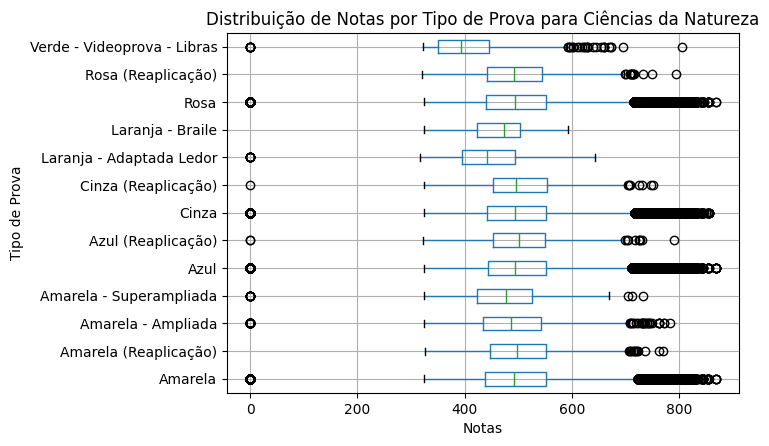

<Figure size 1200x600 with 0 Axes>

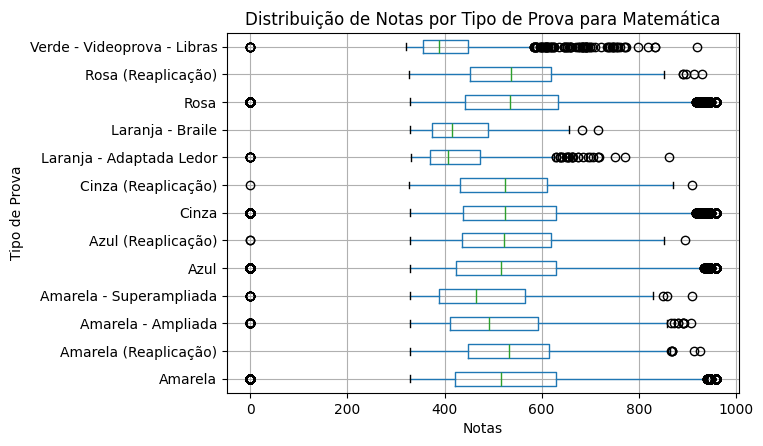

<Figure size 1200x600 with 0 Axes>

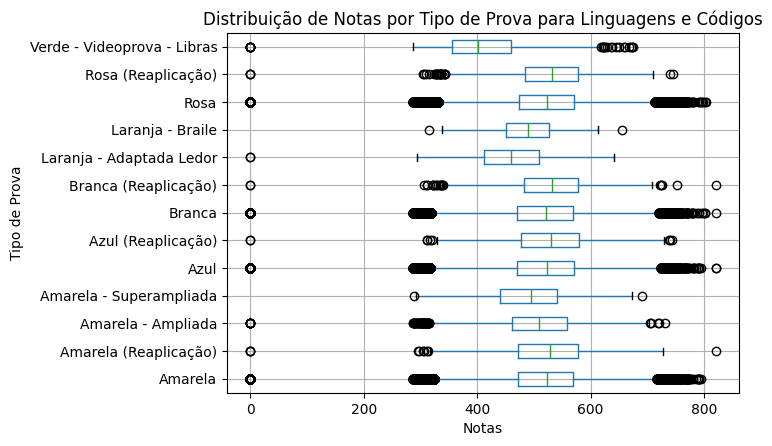

<Figure size 1200x600 with 0 Axes>

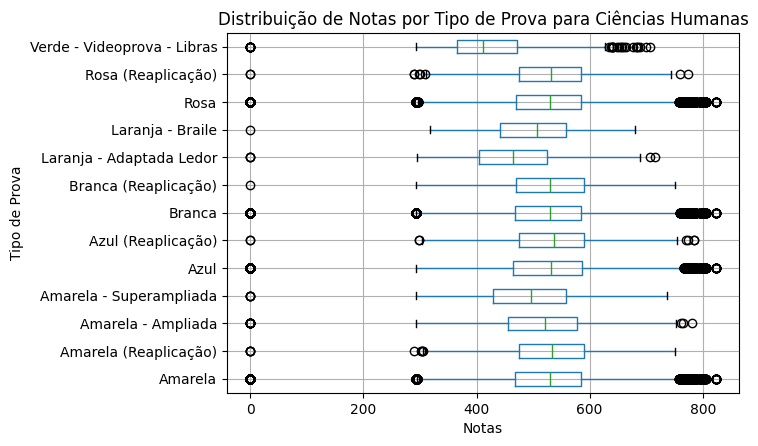

In [20]:
# Lista dos tipos de prova para usar nos filtros e nos plots
tipos_prova = [
    'Azul', 'Amarela', 'Rosa', 'Cinza', 'Amarela - Ampliada', 'Amarela - Superampliada',
    'Laranja - Braile', 'Laranja - Adaptada Ledor', 'Verde - Videoprova - Libras',
    'Azul (Reaplicação)', 'Amarela (Reaplicação)', 'Rosa (Reaplicação)', 'Cinza (Reaplicação)'
]

# Função para plotar boxplots para cada tipo de prova
def plot_boxplots(area, desc_col, nota_col):
    plt.figure(figsize=(12, 6))
    # Filtrar o DataFrame para remover linhas sem notas
    filtered_df = data[data[nota_col].notna()]
    # Boxplot de notas por tipo de prova
    filtered_df.boxplot(column=nota_col, by=desc_col, vert=False)
    plt.title(f'Distribuição de Notas por Tipo de Prova para {area}')
    plt.xlabel('Notas')
    plt.ylabel('Tipo de Prova')
    plt.suptitle('')
    plt.show()

# Plotar boxplots para cada área
plot_boxplots('Ciências da Natureza', 'Prova_CN_Desc', 'NU_NOTA_CN')
plot_boxplots('Matemática', 'Prova_MT_Desc', 'NU_NOTA_MT')
plot_boxplots('Linguagens e Códigos', 'Prova_LC_Desc', 'NU_NOTA_LC')
plot_boxplots('Ciências Humanas', 'Prova_CH_Desc', 'NU_NOTA_CH')

**Dispersão**: Para a prova de Ciências da Natureza e de Linguagens e Códigos temos uma menor dispersão de notas, o intervalo interquartil é menor para todos os tipos de prova, o que indica que as notas estão mais agrupadas em torno da mediana. Já em Matemática e Ciências Humanas, a dispersão é maior, o que indica que as notas estão mais espalhadas.

**Desempenho**: É possível observar que no geral o desemepnho é o mesmo, com uma exceção para o tipo Verde e Laranja onde o IQR é mais deslocado para a esquerda indicando notas menores como um todo.

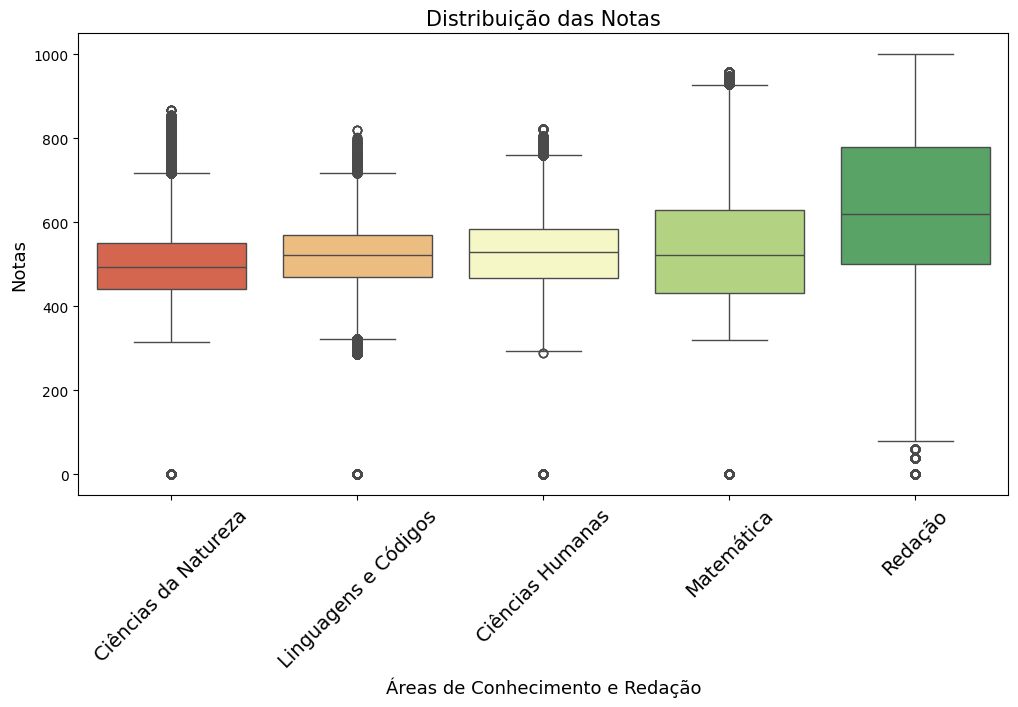

In [21]:
# Selecionar as colunas de notas das disciplinas e redação
notas_disciplinas = ['NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_MT']
nota_redacao = 'NU_NOTA_REDACAO'

# Criar um DataFrame com as notas
notas_df = data[notas_disciplinas + [nota_redacao]]

# Rótulos das disciplinas e redação
labels = ['Ciências da Natureza', 'Linguagens e Códigos', 'Ciências Humanas', 'Matemática', 'Redação']

# Definir paleta de cores
cores = sns.color_palette("RdYlGn", n_colors=len(labels))

# Plotar boxplot das notas com rótulos personalizados e cores destacando a ordenação
plt.figure(figsize=(12, 6))
sns.boxplot(data=notas_df, palette=cores)
plt.xticks(rotation=45, fontsize=14)
plt.title('Distribuição das Notas', fontsize=15)
plt.xlabel('Áreas de Conhecimento e Redação', fontsize=13)
plt.ylabel('Notas', fontsize=13)
plt.xticks(ticks=range(len(labels)), labels=labels)  # Definir os rótulos no eixo x
plt.show()

Analisando o gráfico de distribuição das notas nas diferentes áreas de conhecimento e redação, podemos fazer as seguintes observações:

**Ciências da Natureza, Linguagens e Códigos, e Ciências Humanas**:
   - **IQR Curto**: Todas essas áreas possuem um intervalo interquartil (IQR) curto, indicando que a maioria das notas está concentrada em uma faixa estreita. Isso sugere que a variabilidade das notas nessas áreas é relativamente baixa.
   - **Bigodes**: Os bigodes dessas áreas não se estendem muito além dos quartis, reforçando a ideia de menor variabilidade dentro dos dados.
   - **Outliers**: Existem outliers em todas essas áreas, indicando a presença de algumas notas que são significativamente diferentes da maioria.

**Matemática e Redação**:
   - **IQR**: As áreas de Matemática e Redação têm um IQR mais amplo em comparação com as outras áreas, indicando maior variabilidade nas notas.
   - **Bigode Superior Mais Extenso**: Ambas as áreas possuem um bigode superior mais extenso, sugerindo uma assimetria positiva (skewed to the right). Isso significa que há uma cauda mais longa de notas altas, indicando a presença de valores extremos superiores.
   - **Bigode Inferior**: O bigode inferior da Redação é mais longo, indicando que a presença de valores extremos inferiores.
   - **Outliers**: Assim como nas outras áreas, Matemática e Redação também possuem outliers, com algumas notas muito altas ou muito baixas em relação à maioria.

In [22]:
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
data_filtrada = data.dropna(subset=colunas_notas)

# Definindo as labels para cada coluna para uso no título
labels_dict = {
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_CH': 'Ciências Humanas',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_MT': 'Matemática',
    'NU_NOTA_REDACAO': 'Redação'
}

def plot_histogram(coluna):
    # Verifica se a coluna é válida
    if coluna not in data_filtrada.columns:
        print(f"Coluna {coluna} não encontrada.")
        return

    # Calcula o número de bins usando a regra de Freedman-Diaconis
    def freedman_diaconis_bins(data):
        Q1, Q3 = np.percentile(data, [25, 75])
        IQR = Q3 - Q1
        bin_width = 2 * IQR / np.cbrt(len(data))
        range_data = np.max(data) - np.min(data)
        num_bins = int(range_data / bin_width)
        return max(1, num_bins)  # Evita ter 0 bins

    num_bins = freedman_diaconis_bins(data_filtrada[coluna])

    # Plotar histograma para a coluna especificada
    plt.figure(figsize=(8, 6))
    sns.histplot(data_filtrada[coluna], kde=False, color='skyblue', bins=num_bins)
    
    # Calcular média e mediana
    mean = data_filtrada[coluna].mean()
    median = data_filtrada[coluna].median()

    # Plotar linhas para média e mediana
    plt.axvline(mean, color='r', linestyle='--', linewidth=1, label=f'Média: {mean:.2f}')
    plt.axvline(median, color='g', linestyle='-', linewidth=1, label=f'Mediana: {median:.2f}')
    
    plt.title(f'Distribuição das Notas de {labels_dict[coluna]}')
    plt.xlabel('Notas')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

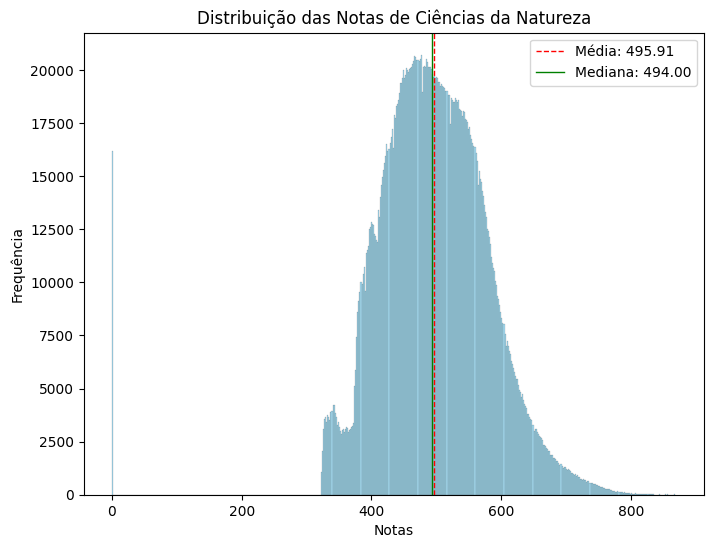

In [23]:
plot_histogram('NU_NOTA_CN')

**Distribuição das Notas**: As notas estão distribuídas de forma assimétrica, com um pico na faixa de 400 a 600. A maioria dos alunos obteve notas nessa faixa.

**Notas Extremas**: Existe um número pequeno de notas muito baixas próximas a 0, o que pode indicar a presença de outliers ou alunos que faltaram à prova.

**Média e Mediana**:
   - **Média**: A média das notas é 495.91.
   - **Mediana**: A mediana das notas é 494.00.

   A proximidade entre média e mediana sugere que a distribuição não é fortemente assimétrica, mas há uma leve assimetria à direita, já que a média é ligeiramente maior que a mediana.

**Densidade de Frequência**: O gráfico de frequência mostra que há um número considerável de alunos que tiraram notas em torno de 500, o que parece ser a moda da distribuição.

**Cauda Direita**: A cauda direita da distribuição é mais longa, indicando que há alguns alunos com notas significativamente acima da média.

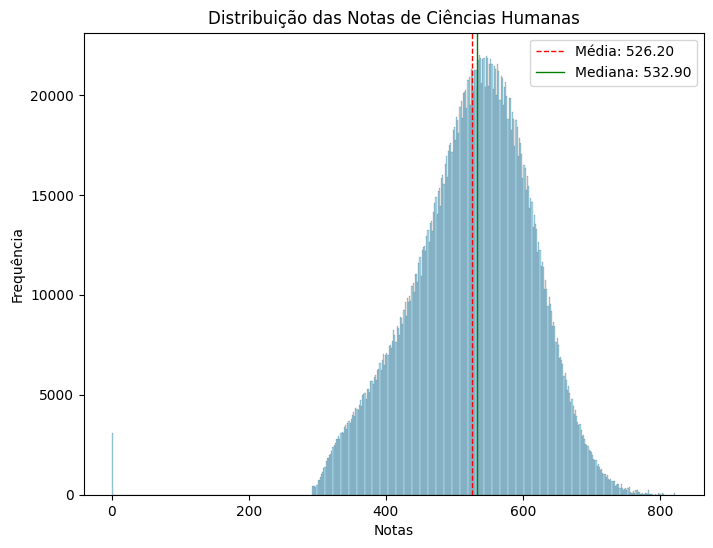

In [24]:
plot_histogram('NU_NOTA_CH')

**Distribuição das Notas**: As notas apresentam uma distribuição relativamente simétrica, com um pico em torno de 500 a 600. A maioria dos alunos obteve notas nessa faixa.

**Notas Extremas**: Assim como no gráfico anterior, existe um pequeno número de notas muito baixas próximas a 0.

**Média e Mediana**:
   - **Média**: A média das notas é 526.20.
   - **Mediana**: A mediana das notas é 532.90.

   A média está um pouco abaixo da mediana, o que sugere uma leve assimetria à esquerda, indicando que há algumas notas muito baixas puxando a média para baixo.

**Densidade de Frequência**: O gráfico de frequência mostra que há um número significativo de alunos que tiraram notas em torno de 530 a 540, o que parece ser a moda da distribuição.

**Cauda Direita**: A cauda direita da distribuição é longa, indicando a presença de alunos com notas significativamente acima da média.

Comparando com o gráfico das notas de Ciências da Natureza, podemos observar que a distribuição das notas de Ciências Humanas é mais simétrica e a média é mais alta. Além disso, a assimetria à esquerda no gráfico de Ciências Humanas indica que há uma influência maior das notas mais baixas na média.

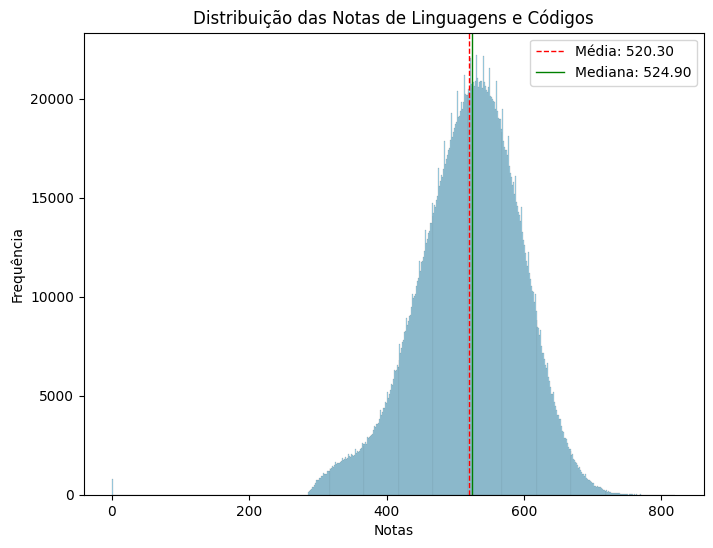

In [25]:
plot_histogram('NU_NOTA_LC')

**Distribuição das Notas**: As notas apresentam uma distribuição aproximadamente simétrica, com um pico em torno de 500 a 600. A maioria dos alunos obteve notas nessa faixa.

**Notas Extremas**: Assim como nos gráficos anteriores, existe um pequeno número de notas muito baixas próximas a 0.

**Média e Mediana**:
   - **Média**: A média das notas é 520.30.
   - **Mediana**: A mediana das notas é 524.90.

   A média está um pouco abaixo da mediana, o que sugere uma leve assimetria à esquerda, indicando que há algumas notas muito baixas puxando a média para baixo.

**Densidade de Frequência**: O gráfico de frequência mostra que há um número significativo de alunos que tiraram notas em torno de 520 a 530, o que parece ser a moda da distribuição.

**Cauda Direita**: A cauda direita da distribuição é longa, indicando a presença de alunos com notas significativamente acima da média.

Comparando com os gráficos de Ciências da Natureza e Ciências Humanas, a distribuição das notas de Linguagens e Códigos também é bastante simétrica e a média é ligeiramente mais baixa que a de Ciências Humanas. A assimetria à esquerda nos três gráficos sugere a presença de notas baixas que afetam a média, mas a mediana está sempre próxima da média, o que indica uma distribuição de notas centrada.

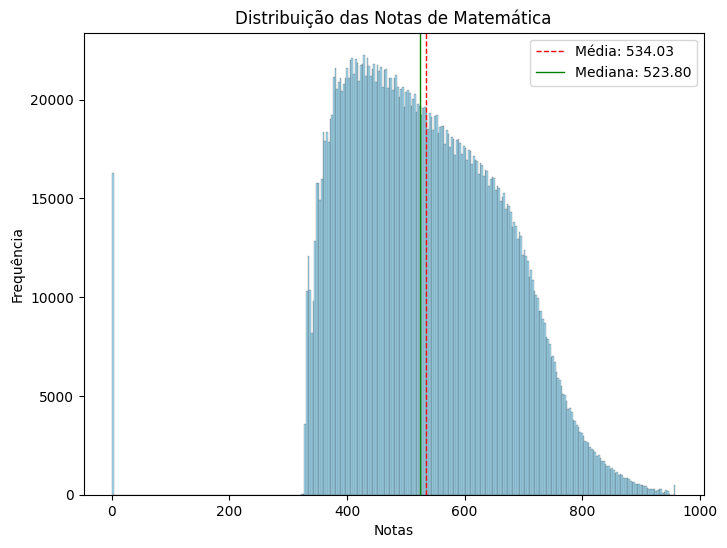

In [26]:
plot_histogram('NU_NOTA_MT')

**Distribuição das Notas**: As notas apresentam uma distribuição assimétrica, com um pico na faixa de 350 a 600. A maioria dos alunos obteve notas nessa faixa.

**Notas Extremas**: Assim como nos gráficos anteriores, existe um pequeno número de notas muito baixas próximas a 0.

**Média e Mediana**:
   - **Média**: A média das notas é 534.03.
   - **Mediana**: A mediana das notas é 523.80.

   A média está acima da mediana, sugerindo uma assimetria à direita, indicando que há algumas notas muito altas puxando a média para cima.

**Densidade de Frequência**: O gráfico de frequência mostra que há um número significativo de alunos que tiraram notas em torno de 400 a 450, o que parece ser a moda da distribuição.

**Cauda Direita**: A cauda direita da distribuição é longa, indicando a presença de alunos com notas significativamente acima da média.

Comparando com os gráficos de Ciências da Natureza, Ciências Humanas e Linguagens e Códigos, a distribuição das notas de Matemática apresenta uma assimetria à direita mais pronunciada, e a média é mais alta que a mediana. Isso sugere que há uma maior variação nas notas de Matemática, com alguns alunos conseguindo notas muito altas.

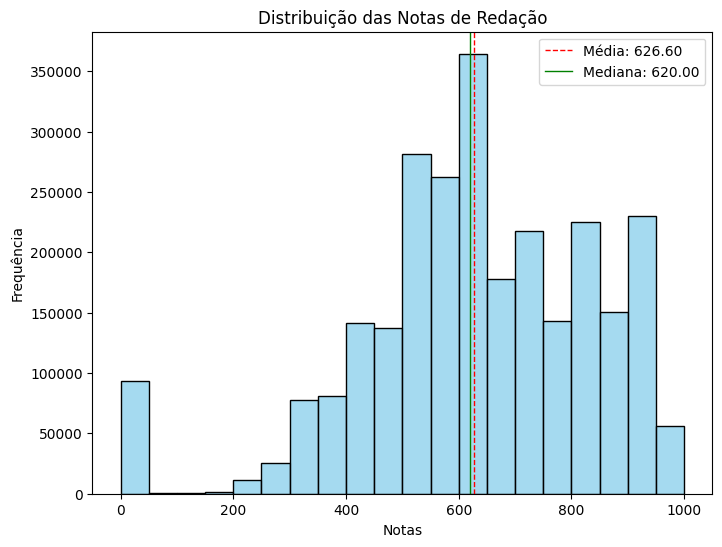

In [27]:
# Dados filtrados para a redação
notas_redacao = data_filtrada['NU_NOTA_REDACAO']

# Definir o número de bins manualmente
numero_de_bins = 20

# Calcular média e mediana
mean = notas_redacao.mean()
median = notas_redacao.median()

# Plotar histograma para a redação com o número de bins definido manualmente
plt.figure(figsize=(8, 6))
sns.histplot(notas_redacao, bins=numero_de_bins, kde=False, color='skyblue')

# Plotar linhas para média e mediana
plt.axvline(mean, color='r', linestyle='--', linewidth=1, label=f'Média: {mean:.2f}')
plt.axvline(median, color='g', linestyle='-', linewidth=1, label=f'Mediana: {median:.2f}')

plt.title('Distribuição das Notas de Redação')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.legend()
plt.show()


**Distribuição das Notas**: As notas apresentam uma distribuição assimétrica, com um pico bastante pronunciado na faixa de 600. A maioria dos alunos obteve notas em torno dessa faixa.

**Notas Extremas**: Existe um número significativo de notas muito baixas próximas a 0.

**Média e Mediana**:
   - **Média**: A média das notas é 626.60.
   - **Mediana**: A mediana das notas é 620.00.

   A média está ligeiramente acima da mediana, sugerindo uma leve assimetria à direita, indicando que há algumas notas muito altas puxando a média para cima.

**Densidade de Frequência**: O gráfico de frequência mostra que há um número significativamente maior de alunos que tiraram notas exatamente 600, o que sugere um ponto de concentração de notas, possivelmente devido a critérios de correção da redação.

**Cauda Direita**: A cauda direita da distribuição é longa, indicando a presença de alunos com notas significativamente acima da média.

Comparando com os gráficos das outras áreas de conhecimento, a distribuição das notas de Redação apresenta uma maior concentração em um ponto específico (600), diferente das distribuições mais espalhadas de outras matérias. Além disso, a presença de muitos outliers com notas muito baixas é mais pronunciada.

# Verificando os valores 0 nas notas

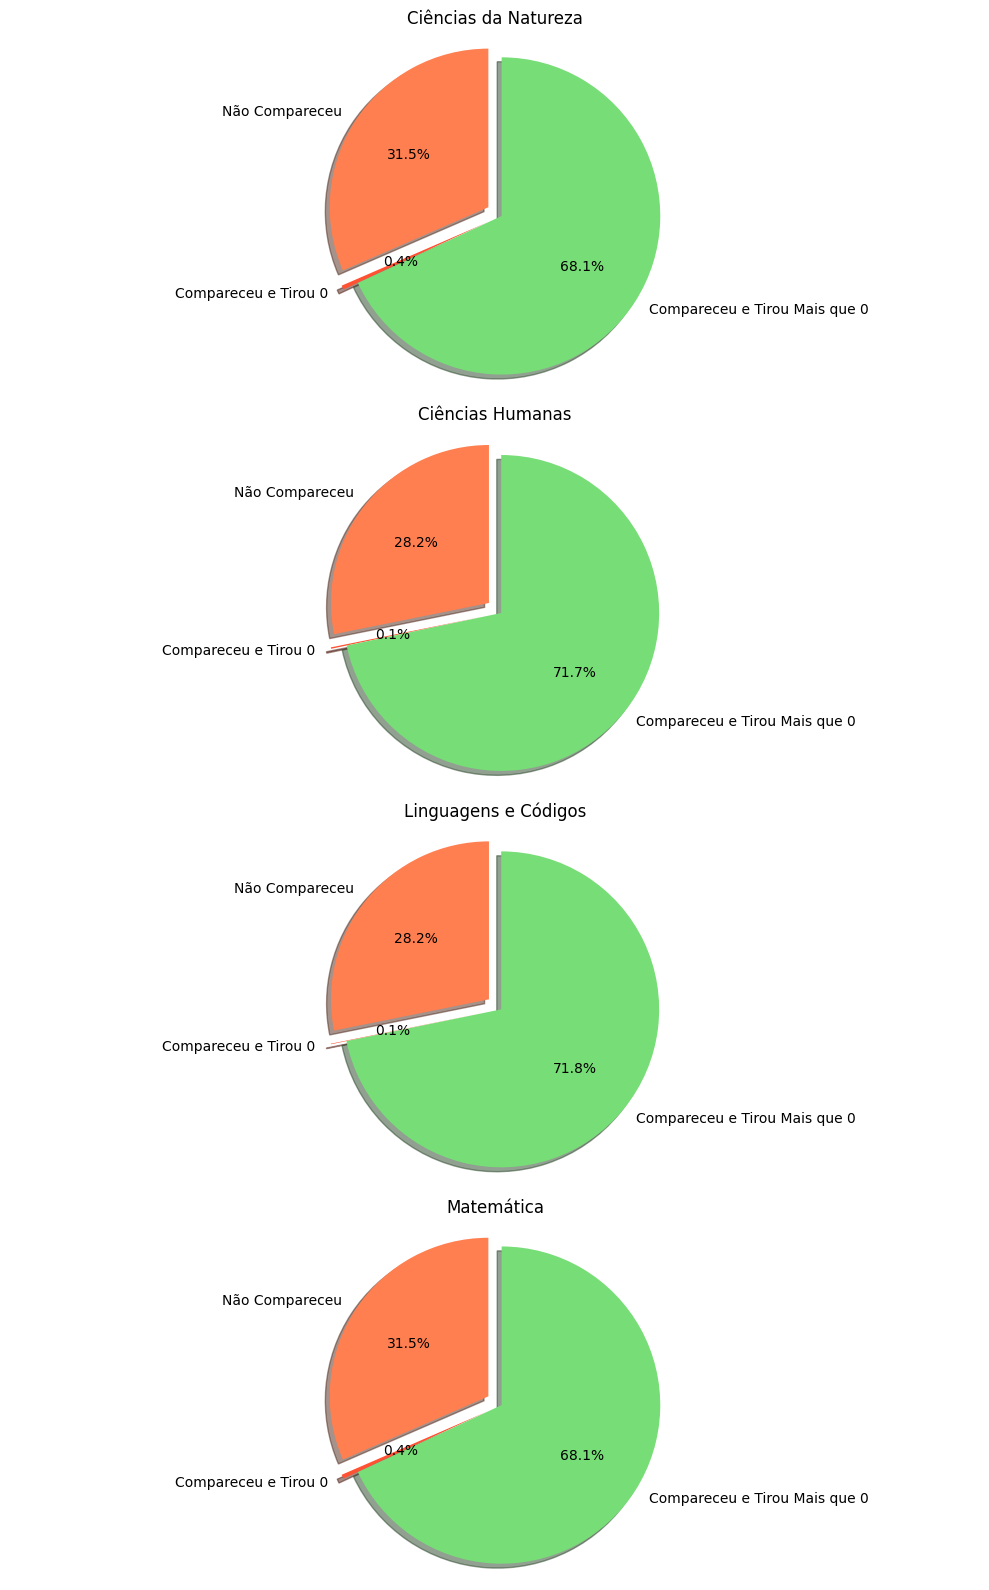

In [28]:
# Função para preparar dados para os gráficos
def prepare_data(data, presence_col, score_col):
    nao_compareceu = data[presence_col].value_counts().get(0, 0)
    compareceu_zero = data[data[presence_col] == 1][score_col].fillna(0).apply(lambda x: x == 0).sum()
    compareceu_nao_zero = data[data[presence_col] == 1][score_col].fillna(0).apply(lambda x: x > 0).sum()
    return [nao_compareceu, compareceu_zero, compareceu_nao_zero]

# Nomes das matérias
subjects = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática']

# Colunas de presença e notas para cada matéria
presence_cols = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
score_cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']

# Configurações de plotagem
colors = ['#ff7f50', '#ff5232', '#77dd77']
explode = (0.1, 0.1, 0)
base_labels = ['Não Compareceu', 'Compareceu e Tirou 0', 'Compareceu e Tirou Mais que 0']

# Configuração do layout de plotagem para uma única coluna
fig, axs = plt.subplots(4, 1, figsize=(10, 16))  # Quatro gráficos, um para cada matéria

# Criando os gráficos de pizza
for i, subject in enumerate(subjects):
    sizes = prepare_data(data, presence_cols[i], score_cols[i])
    # Filtrar labels e cores baseado em sizes não ser zero
    filtered_labels = [label for size, label in zip(sizes, base_labels) if size > 0]
    filtered_sizes = [size for size in sizes if size > 0]
    filtered_colors = [color for size, color in zip(sizes, colors) if size > 0]
    filtered_explode = [exp for size, exp in zip(sizes, explode) if size > 0]
    axs[i].pie(filtered_sizes, explode=filtered_explode, labels=filtered_labels, colors=filtered_colors, autopct='%1.1f%%',
               shadow=True, startangle=90)
    axs[i].set_title(subject)
    axs[i].axis('equal')  # Garante que a pizza seja desenhada como um círculo

plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()

### Análise Específica:

**Ciências da Natureza e Matemática**:
   - Ambas as áreas têm uma taxa de não comparecimento mais alta (31.5%) e uma pequena proporção de alunos que tiraram nota zero (0.4%). Como a prova é feita no mesmo dia, possuem a mesma porcentagem.

**Ciências Humanas e Linguagens e Códigos**:
   - Ambas as áreas têm uma taxa de comparecimento ligeiramente superior (71.7% e 71.8%, respectivamente).

A porcentagem de faltas é bem similar, o que sugere que os alunos que faltaram a uma prova também faltaram à outra.

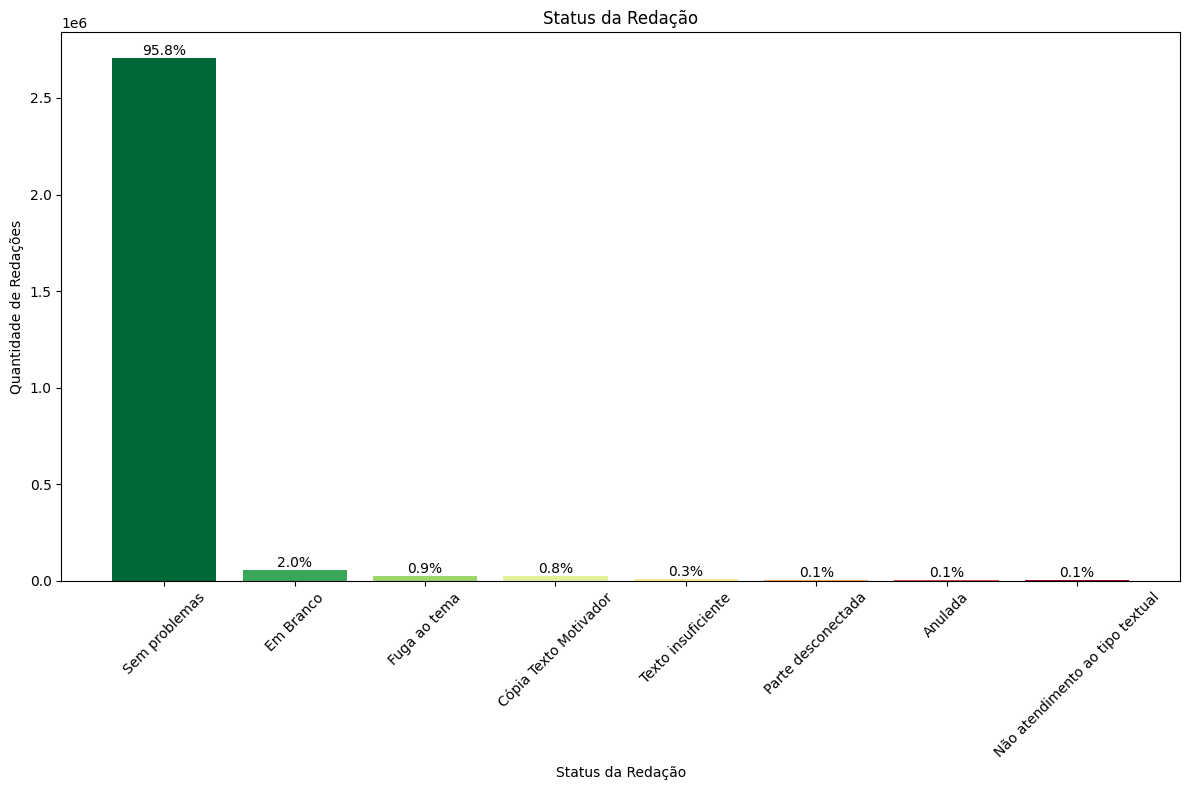

In [29]:
# Função específica para redação considerando o status
def prepare_data_redacao(data, status_col):
    # Contar ocorrências de cada status
    status_counts = data[status_col].value_counts().dropna()
    return status_counts

# Mapeando os códigos de status para descrições
status_labels = {
    1: "Sem problemas",
    2: "Anulada",
    3: "Cópia Texto Motivador",
    4: "Em Branco",
    6: "Fuga ao tema",
    7: "Não atendimento ao tipo textual",
    8: "Texto insuficiente",
    9: "Parte desconectada"
}

# Preparando os dados
sizes = prepare_data_redacao(data, 'TP_STATUS_REDACAO')
labels = [status_labels[index] for index in sizes.index]  # Assumindo que todos os índices podem ser mapeados corretamente
total = sizes.sum()

# Gerar cores dinâmicas usando RdYlGn
colors = plt.cm.RdYlGn_r(np.linspace(0, 1, len(labels)))

# Plot para redação usando gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(labels, sizes, color=colors)

# Adicionar texto para cada barra
for bar in bars:
    yval = bar.get_height()
    percentage = f"{yval / total * 100:.1f}%"
    ax.text(bar.get_x() + bar.get_width()/2, yval, percentage, va='bottom', ha='center')  # Coloca a porcentagem no topo da barra

ax.set_title('Status da Redação')
ax.set_ylabel('Quantidade de Redações')
ax.set_xlabel('Status da Redação')
plt.xticks(rotation=45)  # Rotação das labels para melhor legibilidade

plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()

A grande maioria das redações, 95.8%, foi classificada como "Sem problemas", indicando que a maioria dos alunos conseguiu seguir as instruções e atender aos critérios exigidos. Também não ocorreram redações nota 0.

# Avaliando as notas de acordo com o tipo de escola

Será que o tipo de escola que o aluno frequentou no Ensino Médio tem alguma relação com o desempenho no ENEM?

<Figure size 1500x1000 with 0 Axes>

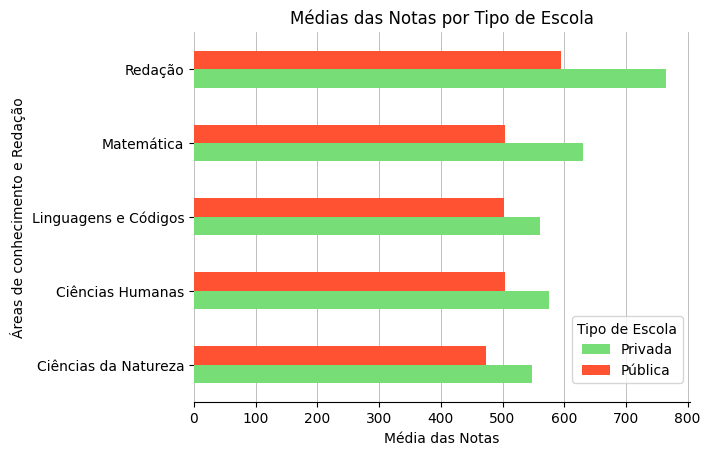

In [30]:
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
coluna_tipo_escola = 'TP_ESCOLA'  # Verifique o mapeamento correto

# Criar uma cópia explícita
dados_filtrados = data.dropna(subset=colunas_notas).copy()

# Mapeamento para o tipo de escola usando a forma recomendada para evitar o FutureWarning
dados_filtrados[coluna_tipo_escola] = dados_filtrados[coluna_tipo_escola].replace({2: 'Pública', 3: 'Privada'})

# Continuação da filtragem
tipos_escola_filtrados = ['Privada', 'Pública']
dados_filtrados = dados_filtrados[dados_filtrados[coluna_tipo_escola].isin(tipos_escola_filtrados)]

# Médias das notas por tipo de escola
media_notas_por_tipo_escola_disciplina = dados_filtrados.groupby([coluna_tipo_escola])[colunas_notas].mean()

# Labels e cores
labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
cores = ['#77dd77', '#ff5232']

# Plotagem
plt.figure(figsize=(15, 10))
ax = media_notas_por_tipo_escola_disciplina.T.plot(kind='barh', color=cores)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7)
plt.title('Médias das Notas por Tipo de Escola')
plt.xlabel('Média das Notas')
plt.ylabel('Áreas de conhecimento e Redação')
plt.yticks(range(len(labels)), labels)
ax.legend(tipos_escola_filtrados, title='Tipo de Escola', loc='upper right', bbox_to_anchor=(1, 0.25))
plt.show()

O gráfico apresenta a comparação entre as médias das notas por tipo de escola (privada e pública) em diferentes áreas de conhecimento do ENEM. Podemos observar algumas tendências interessantes:

**Desempenho Superior das Escolas Privadas**: Em todas as áreas do conhecimento, incluindo Redação, Matemática, Linguagens e Códigos, Ciências Humanas e Ciências da Natureza, as escolas privadas apresentam médias de notas superiores às das escolas públicas. Isso sugere que os estudantes de escolas privadas, em geral, têm um desempenho melhor no ENEM.

**Maior Discrepância em Matemática e na Redação**: A diferença entre as médias das notas de escolas privadas e públicas é particularmente marcante em Matemática e Redação. Isso pode indicar diferenças na qualidade ou quantidade de ensino e recursos disponíveis para estudantes em escolas privadas versus públicas nesta disciplina.

**Implicações para Políticas Educacionais**: Os dados sugerem que pode haver uma necessidade de revisão e potencial reforço de recursos e métodos de ensino nas escolas públicas para reduzir a disparidade educacional. Investimentos em melhorias em áreas críticas, como Matemática, poderiam ajudar a elevar o desempenho dos estudantes em escolas públicas.

# Avaliando as notas de acordo com o sexo dos participantes

Será que o sexo dos participantes tem alguma influência nas notas obtidas nas diferentes áreas de conhecimento e na redação?

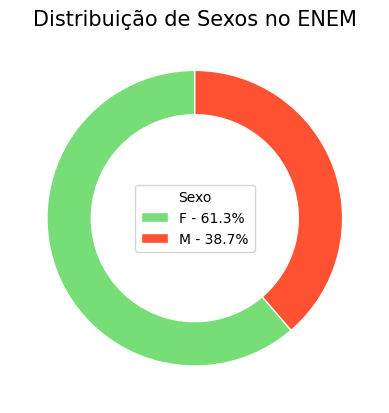

In [31]:
# Contar a quantidade de cada sexo no DataFrame
distribuicao_sexos = data['TP_SEXO'].value_counts()

# Definir as cores para cada sexo
cores = ['#77dd77', '#ff5232']

# Criar o gráfico de donut
fig, ax = plt.subplots()
wedges, texts = ax.pie(distribuicao_sexos, startangle=90, colors=cores, wedgeprops=dict(width=0.3, edgecolor='w'))

# Adicionar círculo branco no meio para criar o efeito de donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Distribuição de Sexos no ENEM', fontsize=15)

# Preparar as legendas com porcentagens
percentages = [f'{label} - {percent:.1f}%' for label, percent in zip(distribuicao_sexos.index, 100 * distribuicao_sexos / distribuicao_sexos.sum())]
legend = ax.legend(wedges, percentages, title="Sexo", loc="center", prop={'size': 10})

plt.show()

A porcentagem de mulheres inscritas é consideravelmente maior. Essa distribuição pode refletir diversas questões sociais e educacionais, como a maior participação das mulheres em exames educacionais e processos seletivos no Brasil. Essa tendência também pode indicar uma maior busca por parte das mulheres por oportunidades educacionais e profissionais.

<Figure size 1500x1000 with 0 Axes>

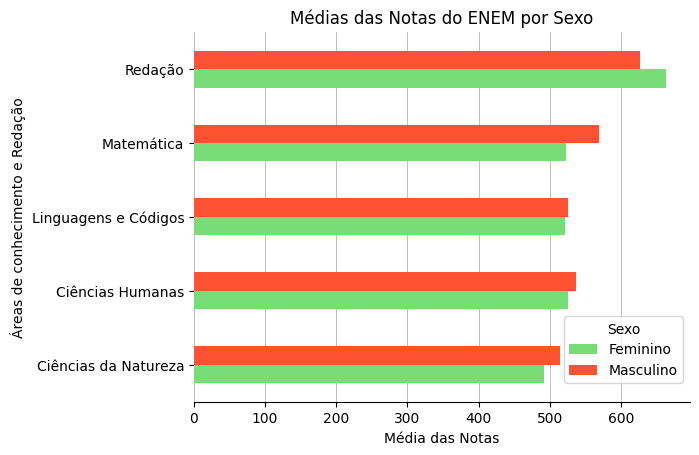

In [32]:
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# Criar uma cópia explícita e remover notas zero
dados_filtrados = data.dropna(subset=colunas_notas).copy()
for coluna in colunas_notas:
    dados_filtrados = dados_filtrados[dados_filtrados[coluna] != 0]

# Agrupar por sexo e calcular as médias
media_notas_por_sexo = dados_filtrados.groupby('TP_SEXO')[colunas_notas].mean()

# Labels e cores
labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
cores = ['#77dd77', '#ff5232']

# Plotagem
plt.figure(figsize=(15, 10))
ax = media_notas_por_sexo.T.plot(kind='barh', color=cores)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7)
plt.title('Médias das Notas do ENEM por Sexo')
plt.xlabel('Média das Notas')
plt.ylabel('Áreas de conhecimento e Redação')
plt.yticks(range(len(labels)), labels)
ax.legend(['Feminino', 'Masculino'], title='Sexo', loc='upper right', bbox_to_anchor=(1, 0.25))
plt.show()

**Redação**:
   - Feminino: Média superior à do sexo masculino.
   - Masculino: Média inferior à do sexo feminino.

**Matemática**:
   - Feminino: Média inferior à do sexo masculino.
   - Masculino: Média superior à do sexo feminino.

**Linguagens e Códigos**:
   - Feminino: Média ligeiramente inferior à do sexo masculino.
   - Masculino: Média ligeiramente superior à do sexo feminino.

**Ciências Humanas**:
   - Feminino: Média ligeiramente inferior à do sexo masculino.
   - Masculino: Média ligeiramente superior à do sexo feminino.

**Ciências da Natureza**:
   - Feminino: Média ligeiramente inferior à do sexo masculino.
   - Masculino: Média superior à do sexo feminino.

### Conclusões:

1. **Redação**: As mulheres tiveram um desempenho médio melhor que os homens na redação.
2. **Áreas de Exatas (Matemática e Ciências da Natureza)**: Os homens tiveram um desempenho médio melhor que as mulheres.
3. **Áreas de Humanas (Linguagens e Códigos, Ciências Humanas)**: Os homens tiveram um desempenho médio ligeiramente superior.

Essa análise pode refletir tendências educacionais e sociais. Por exemplo, o melhor desempenho das mulheres na redação pode ser influenciado por uma maior ênfase na habilidade de comunicação escrita. O desempenho dos homens em áreas exatas pode estar relacionado a diferenças no interesse ou incentivo cultural em certas disciplinas.

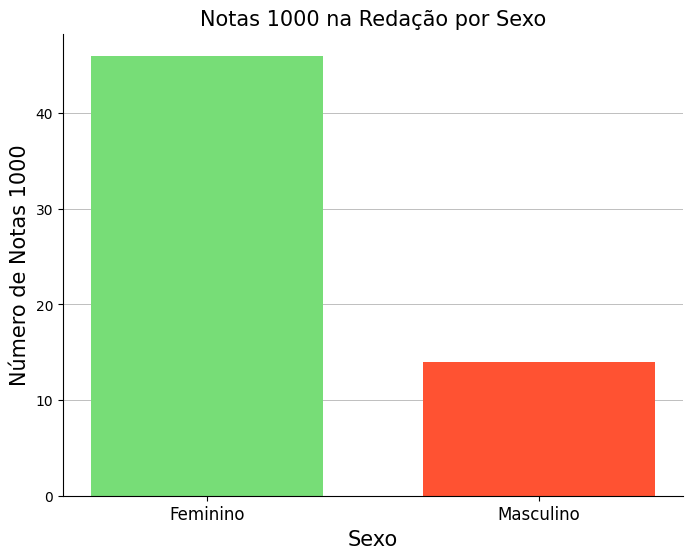

In [33]:
# Filtrar apenas as linhas com notas 1000
filtered_dataframe = data[data['NU_NOTA_REDACAO'] == 1000].copy()

# Mapear os valores de sexo para números (feminino = 0, masculino = 1)
filtered_dataframe['TP_SEXO'] = filtered_dataframe['TP_SEXO'].map({'F': 0, 'M': 1})

# Criar um DataFrame com a contagem de notas 1000 por sexo
count_by_sex = filtered_dataframe['TP_SEXO'].value_counts().sort_index()

# Definir cores para as barras
colors = ['#77dd77', '#ff5232']

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))  # Tamanho do gráfico
bars = plt.bar(count_by_sex.index, count_by_sex.values, color=colors, width=0.7)

plt.xlabel('Sexo', fontsize=15)
plt.ylabel('Número de Notas 1000', fontsize=15)
plt.title('Notas 1000 na Redação por Sexo', fontsize=15)
plt.xticks(count_by_sex.index, ['Feminino', 'Masculino'], fontsize=12)

# Remover bordas do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# Adicionar grid
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7)

plt.show()

Este gráfico mostra a distribuição de notas máximas (1000) na redação do ENEM, separadas por sexo. As observações principais incluem:

**Desempenho Superior Feminino**: Há um número significativamente maior de candidatas do sexo feminino que alcançaram a nota máxima na redação comparado aos candidatos do sexo masculino. Isso sugere que as candidatas femininas, em geral, se saíram melhor na redação.

**Implicações sobre Habilidades de Escrita**: A disparidade nas notas pode refletir diferenças nas habilidades de escrita entre os sexos. Estudos anteriores sugerem que meninas frequentemente desenvolvem habilidades de leitura e escrita mais cedo do que meninos, o que pode influenciar os resultados em avaliações de redação.[referencia]

**Considerações Educacionais**: Este resultado pode motivar uma análise mais aprofundada das estratégias pedagógicas no ensino de habilidades de escrita nas escolas, particularmente para entender e mitigar as diferenças de desempenho entre os sexos.

**Contexto Social e Cultural**: As diferenças também podem estar influenciadas por fatores sociais e culturais que afetam a maneira como meninos e meninas são educados em relação às habilidades de comunicação e expressão.

# Avaliando as notas de acordo com a Etnia dos participantes

Será que a cor/raça dos participantes tem alguma influência nas notas obtidas nas diferentes áreas de conhecimento e na redação?

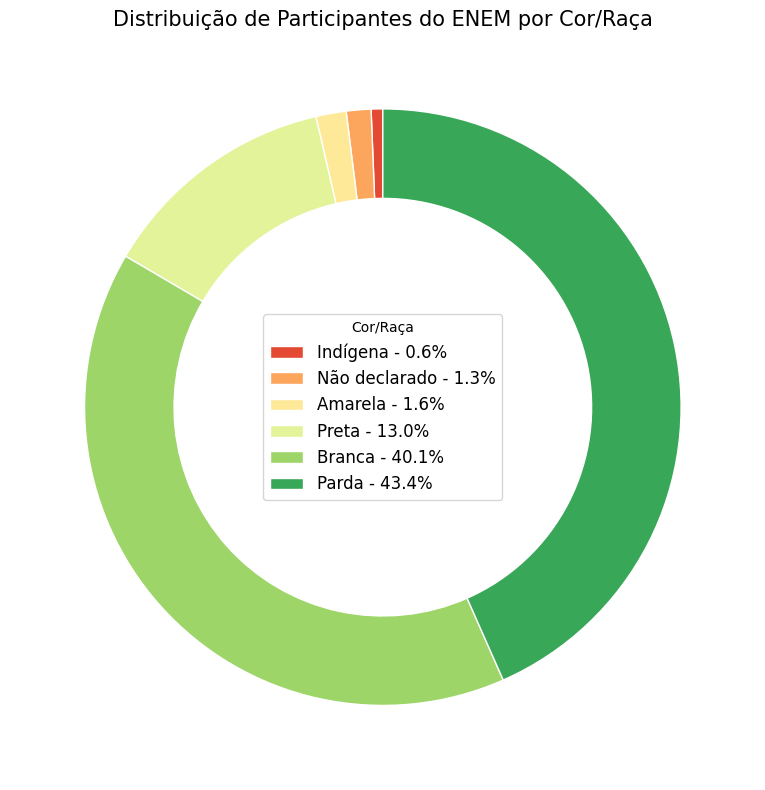

In [34]:
# Calculando a distribuição de participantes por cor/raça
distribuicao_participantes_por_raca = data['Cor_Raca_Desc'].value_counts(normalize=True).sort_values()

# Definir cores usando a paleta de cores "RdYlGn"
cores = sns.color_palette("RdYlGn", n_colors=len(distribuicao_participantes_por_raca))

# Criar o gráfico de donut
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts = ax.pie(distribuicao_participantes_por_raca, labels=None, autopct=None, startangle=90, colors=cores, wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.85)

# Adicionar círculo branco no meio para criar o efeito de donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Distribuição de Participantes do ENEM por Cor/Raça', fontsize=15)

# Criar legenda no centro do donut incluindo as porcentagens
labels = [f'{label} - {pct*100:.1f}%' for label, pct in zip(distribuicao_participantes_por_raca.index, distribuicao_participantes_por_raca)]
ax.legend(wedges, labels, title="Cor/Raça", loc="center", prop={'size': 12})

plt.tight_layout()
plt.show()

### Distribuição de Participantes por Cor/Raça:

**Parda**:
   - A maior proporção de participantes se identifica como parda, representando 43.4% do total. Isso reflete a composição racial da população brasileira, onde uma grande parte se identifica como parda.

**Branca**:
   - A segunda maior proporção de participantes se identifica como branca, representando 40.1% do total. Esta também é uma representação significativa da população brasileira.

**Preta**:
   - 13.0% dos participantes se identificam como pretos. Este é um número substancial que destaca a participação de pessoas pretas no ENEM.

**Amarela**:
   - 1.6% dos participantes se identificam como amarelos. Este grupo é relativamente menor em comparação com os outros.

**Não Declarado**:
   - 1.3% dos participantes não declararam sua cor/raça. Isso pode indicar uma preferência por não compartilhar essa informação ou uma falta de opção adequada.

**Indígena**:
   - 0.6% dos participantes se identificam como indígenas. Este é o menor grupo representado, o que reflete a menor proporção de indígenas na população brasileira em geral.

### Implicações e Considerações:

**Diversidade**:
   - A distribuição por cor/raça mostra a diversidade dos participantes do ENEM. A presença significativa de participantes pardos e brancos reflete a composição racial diversificada do Brasil.

**Políticas de Inclusão**:
   - A participação de grupos minoritários, como pretos, amarelos e indígenas, é crucial para as políticas de inclusão e ações afirmativas. Os dados podem ser usados para avaliar e ajustar essas políticas para garantir maior equidade e representatividade.

**Desafios e Oportunidades**:
   - As diferenças nas proporções de participação podem indicar desafios específicos enfrentados por certos grupos raciais em acessar e se preparar para o ENEM. Iniciativas específicas podem ser necessárias para apoiar esses grupos e garantir igualdade de oportunidades.

**Fatores Culturais e Sociais**:
   - A decisão de não declarar a cor/raça por 1.3% dos participantes pode refletir fatores culturais e sociais que influenciam a autoidentificação. Entender esses fatores pode ajudar a melhorar a coleta de dados e a sensibilidade das políticas públicas.

In [35]:
def plot_average_scores_by_category(data, score_column, category_column, title, xlabel):
    """
    Plota as médias de notas por categorias específicas, excluindo a categoria 'Não declarado'.

    Args:
    data (DataFrame): DataFrame contendo os dados.
    score_column (str): Nome da coluna contendo as notas.
    category_column (str): Nome da coluna contendo as categorias.
    title (str): Título do gráfico.
    xlabel (str): Rótulo do eixo X.
    """
    # Filtrar a categoria 'Não declarado'
    filtered_data = data[data[category_column] != 'Não declarado']
    
    # Calculando as médias das notas por categoria
    average_scores_by_category = filtered_data.groupby(category_column)[score_column].mean().sort_values()

    # Definir cores usando a paleta de cores "RdYlGn"
    colors = sns.color_palette("RdYlGn", n_colors=len(average_scores_by_category))

    # Criar o gráfico de barras horizontais
    plt.figure(figsize=(12, 6))
    bars = plt.barh(average_scores_by_category.index, average_scores_by_category, color=colors)

    plt.xlabel(xlabel, fontsize=15)
    plt.title(title, fontsize=15)
    plt.grid(True, linestyle='--', which='both', alpha=0.5)

    # Remover as bordas superior e direita
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Deixar grades atrás das barras
    plt.gca().set_axisbelow(True)

    # Adicionar valores das médias nas barras
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
                 va='center', ha='left', fontsize=12, color='black')

    plt.tight_layout()
    plt.show()

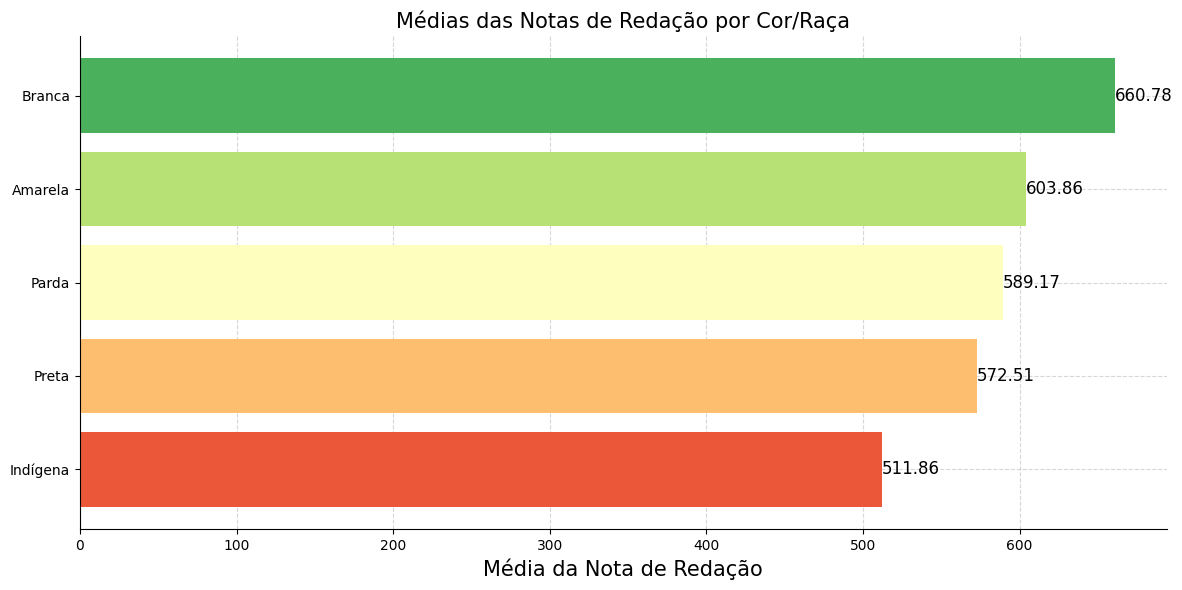

In [36]:
# Chamando a função
plot_average_scores_by_category(data, 'NU_NOTA_REDACAO', 'Cor_Raca_Desc', 'Médias das Notas de Redação por Cor/Raça', 'Média da Nota de Redação')

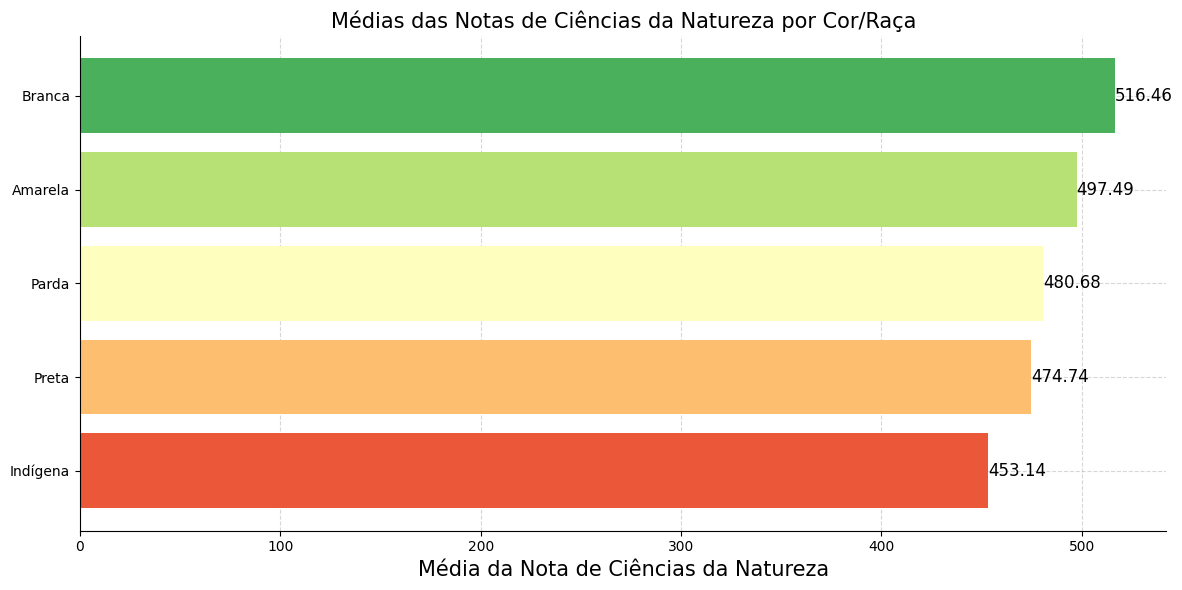

In [37]:
# Chamando a função
plot_average_scores_by_category(data, 'NU_NOTA_CN', 'Cor_Raca_Desc', 'Médias das Notas de Ciências da Natureza por Cor/Raça', 'Média da Nota de Ciências da Natureza')

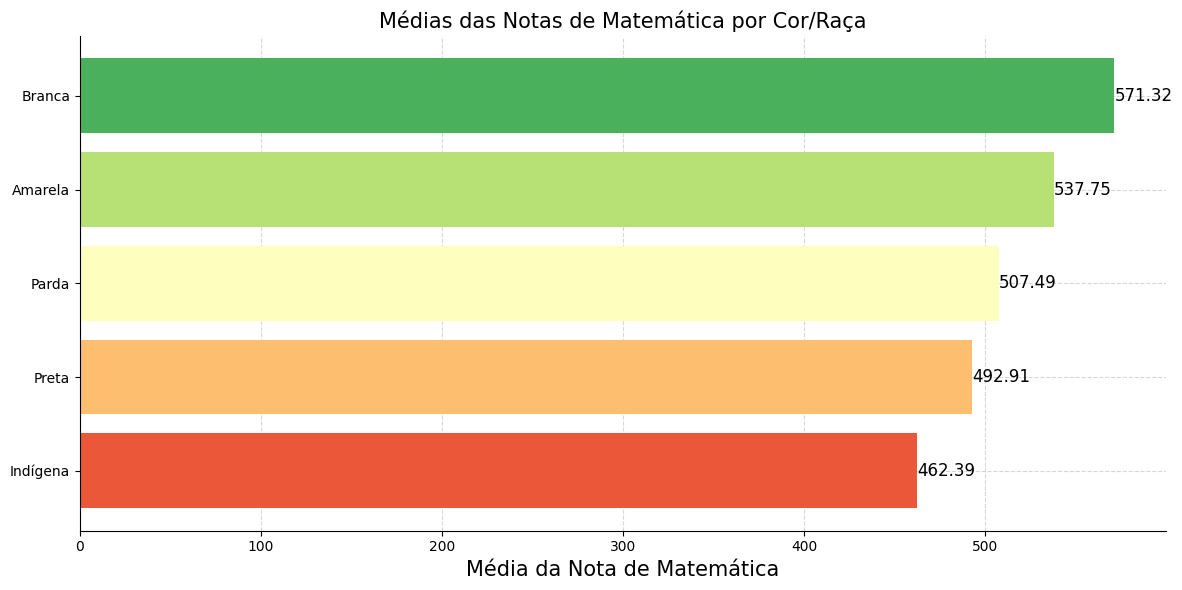

In [38]:
# Chamando a função
plot_average_scores_by_category(data, 'NU_NOTA_MT', 'Cor_Raca_Desc', 'Médias das Notas de Matemática por Cor/Raça', 'Média da Nota de Matemática')

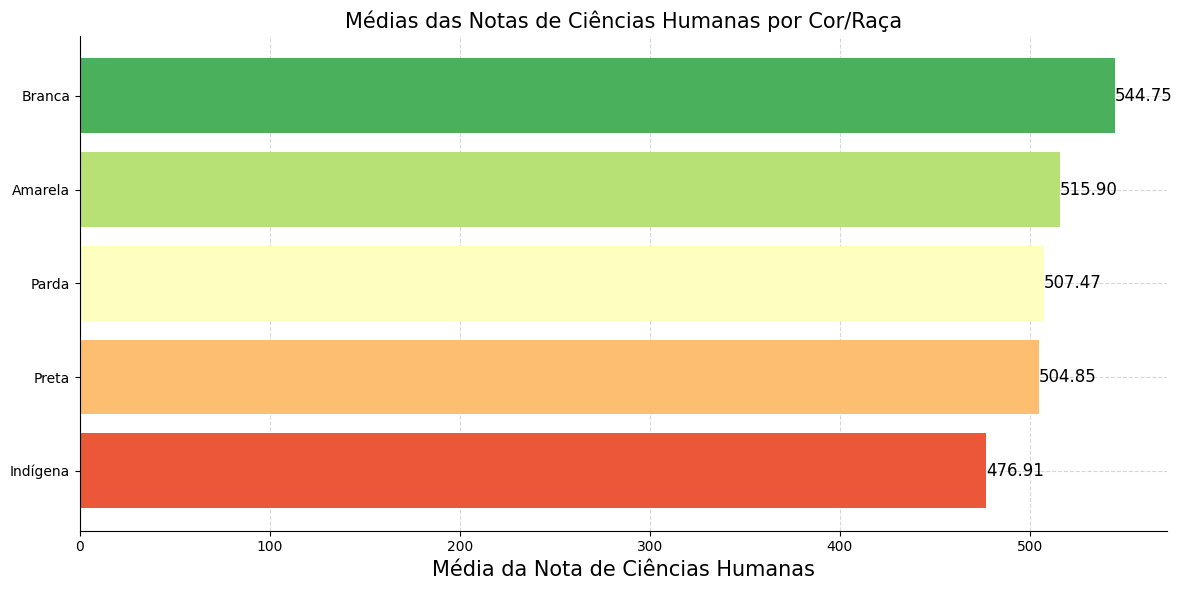

In [39]:
# Chamando a função
plot_average_scores_by_category(data, 'NU_NOTA_CH', 'Cor_Raca_Desc', 'Médias das Notas de Ciências Humanas por Cor/Raça', 'Média da Nota de Ciências Humanas')

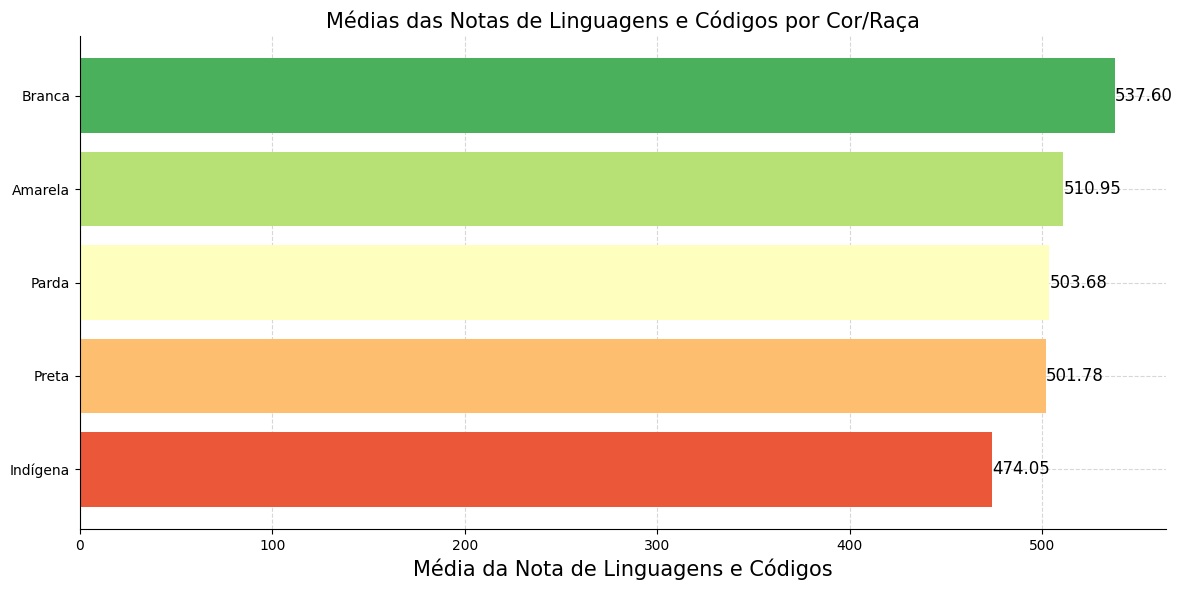

In [40]:
# Chamando a função
plot_average_scores_by_category(data, 'NU_NOTA_LC', 'Cor_Raca_Desc', 'Médias das Notas de Linguagens e Códigos por Cor/Raça', 'Média da Nota de Linguagens e Códigos')

### Implicações e Considerações:

**Desigualdade de Desempenho**:
   - Os gráficos revelam desigualdades significativas no desempenho entre os diferentes grupos raciais. Participantes brancos e amarelos tendem a ter médias mais altas comparadas a pardos, pretos e indígenas.

**Fatores Contribuintes**:
   - Diversos fatores podem contribuir para essas diferenças, incluindo acesso desigual à educação de qualidade, recursos educacionais, apoio familiar, discriminação sistêmica e socioeconômica, entre outros.

**Políticas de Inclusão e Suporte**:
   - Os dados indicam a necessidade de políticas específicas e ações afirmativas para apoiar grupos que historicamente têm menor desempenho. Programas de tutoria, acesso a recursos educacionais e iniciativas para combater a desigualdade educacional podem ser necessários.

**Foco no Desenvolvimento de Habilidades**:
   - Esforços adicionais podem ser focados em desenvolver habilidades em Linguagens e Códigos entre os grupos com médias mais baixas, especialmente entre participantes pretos, pardos e indígenas. Isso pode incluir treinamentos específicos, workshops e acesso a mais materiais de estudo.

**Monitoramento Contínuo**:
   - É importante continuar monitorando as médias de desempenho por cor/raça ao longo dos anos para avaliar a eficácia das políticas implementadas e garantir que todos os grupos raciais tenham oportunidades iguais para atingir seu potencial máximo.

# Avaliando as notas de acordo com a faixa socioeconômica

Será que a renda dos participantes tem alguma influência nas notas obtidas nas diferentes áreas de conhecimento e na redação?

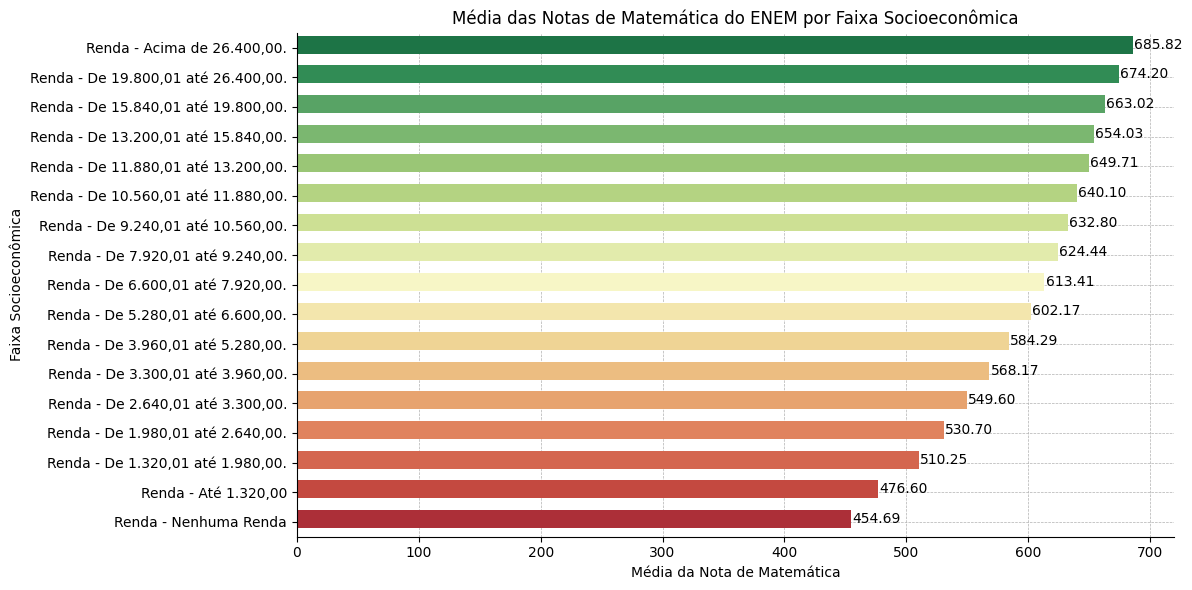

In [41]:
def plot_mean_scores(data, score_column, xlabel, ylabel, title):
    # Mapeamento das faixas de renda
    income_labels = {
        'A': 'Renda - Nenhuma Renda',
        'B': 'Renda - Até 1.320,00',
        'C': 'Renda - De 1.320,01 até 1.980,00.',
        'D': 'Renda - De 1.980,01 até 2.640,00.',
        'E': 'Renda - De 2.640,01 até 3.300,00.',
        'F': 'Renda - De 3.300,01 até 3.960,00.',
        'G': 'Renda - De 3.960,01 até 5.280,00.',
        'H': 'Renda - De 5.280,01 até 6.600,00.',
        'I': 'Renda - De 6.600,01 até 7.920,00.',
        'J': 'Renda - De 7.920,01 até 9.240,00.',
        'K': 'Renda - De 9.240,01 até 10.560,00.',
        'L': 'Renda - De 10.560,01 até 11.880,00.',
        'M': 'Renda - De 11.880,01 até 13.200,00.',
        'N': 'Renda - De 13.200,01 até 15.840,00.',
        'O': 'Renda - De 15.840,01 até 19.800,00.',
        'P': 'Renda - De 19.800,01 até 26.400,00.',
        'Q': 'Renda - Acima de 26.400,00.'
    }

    # Calculando a média da nota por faixa socioeconômica
    mean_scores = data.groupby('Q006')[score_column].mean().reset_index()
    mean_scores['Q006'] = mean_scores['Q006'].map(income_labels)  # Mapear as faixas

    # Ordenar os dados para que a maior média apareça no topo
    mean_scores = mean_scores.sort_values(by=score_column, ascending=False)

    # Criando o gráfico de barras horizontais
    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(x=score_column, y='Q006', data=mean_scores, palette='RdYlGn_r', hue='Q006', dodge=False, height=0.6)  # Ajuste na altura das barras
    plt.legend([],[], frameon=False)  # Remover a legenda redundante

    # Adicionando a média ao lado de cada barra
    for p in barplot.patches:
        width = p.get_width()
        plt.text(width + 1, p.get_y() + p.get_height() / 2, '{:1.2f}'.format(width), ha='left', va='center')

    # Adicionar títulos e labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    # Grade atrás das barras
    plt.gca().set_axisbelow(True)

    # Removendo as bordas superior e direita
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Exibir o gráfico
    plt.show()

plot_mean_scores(data, 'NU_NOTA_MT', 'Média da Nota de Matemática', 'Faixa Socioeconômica', 'Média das Notas de Matemática do ENEM por Faixa Socioeconômica')

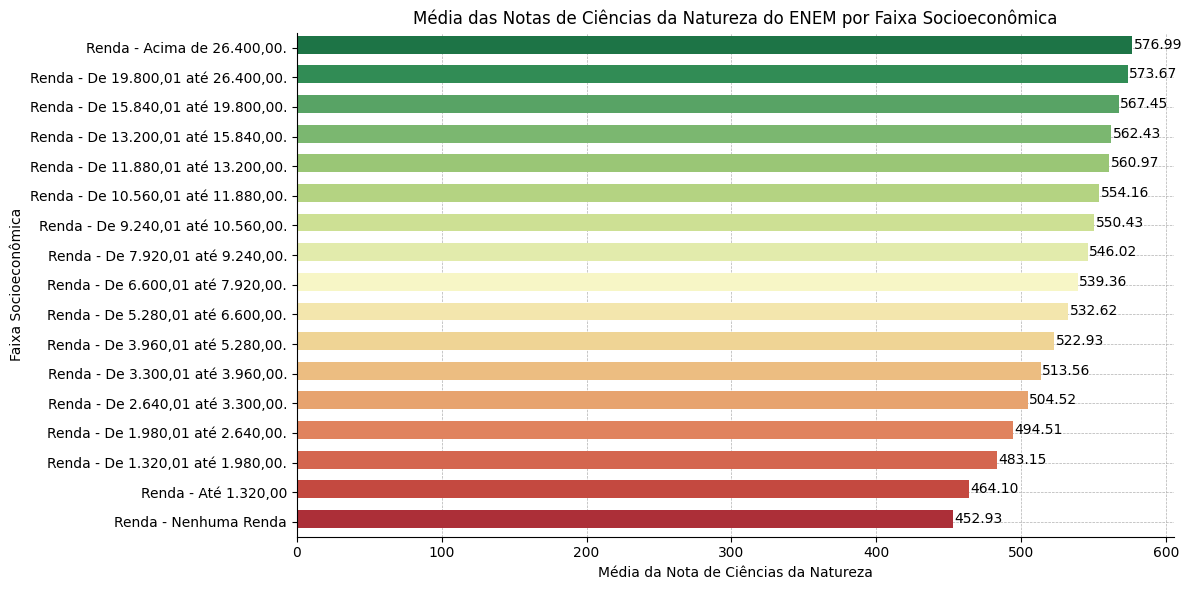

In [42]:
plot_mean_scores(data, 'NU_NOTA_CN', 'Média da Nota de Ciências da Natureza', 'Faixa Socioeconômica', 'Média das Notas de Ciências da Natureza do ENEM por Faixa Socioeconômica')

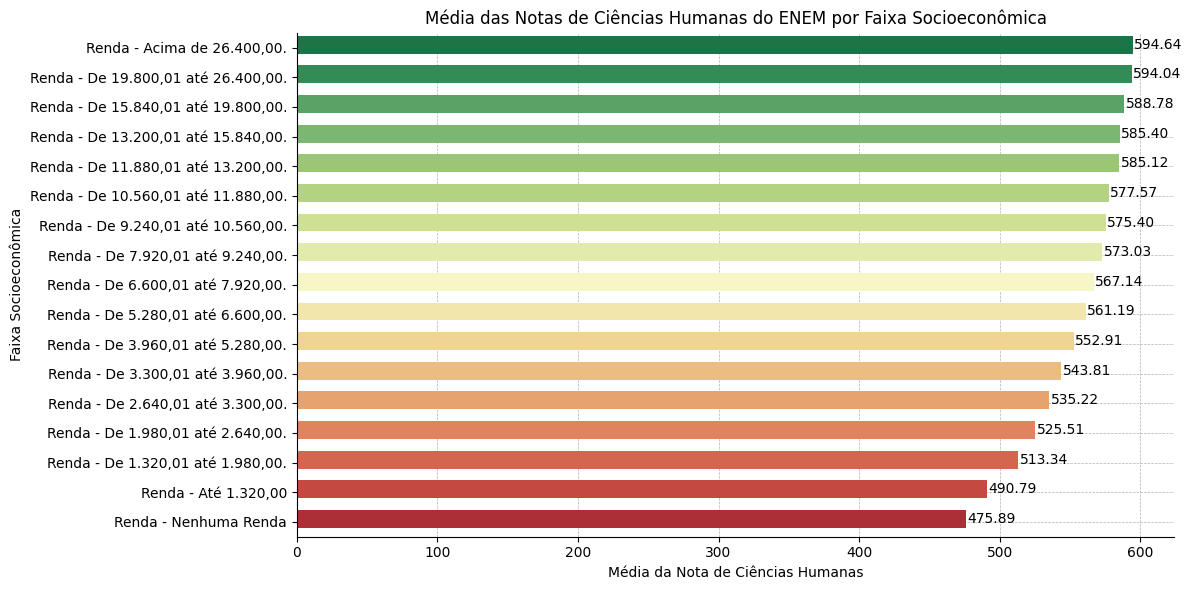

In [43]:
plot_mean_scores(data, 'NU_NOTA_CH', 'Média da Nota de Ciências Humanas', 'Faixa Socioeconômica', 'Média das Notas de Ciências Humanas do ENEM por Faixa Socioeconômica')

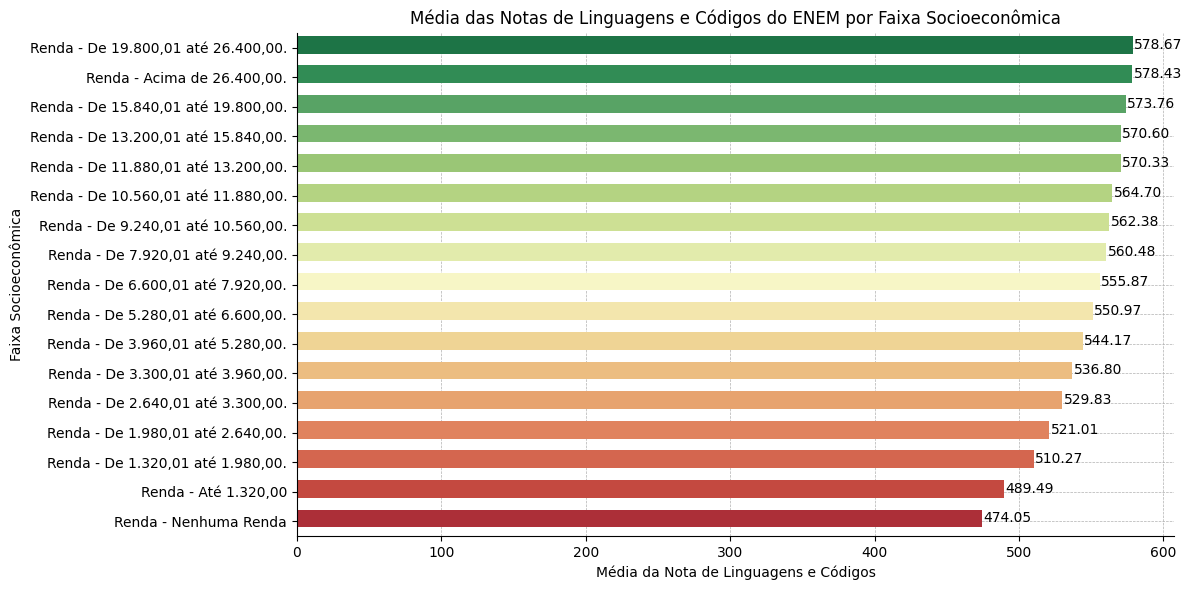

In [44]:
plot_mean_scores(data, 'NU_NOTA_LC', 'Média da Nota de Linguagens e Códigos', 'Faixa Socioeconômica', 'Média das Notas de Linguagens e Códigos do ENEM por Faixa Socioeconômica')

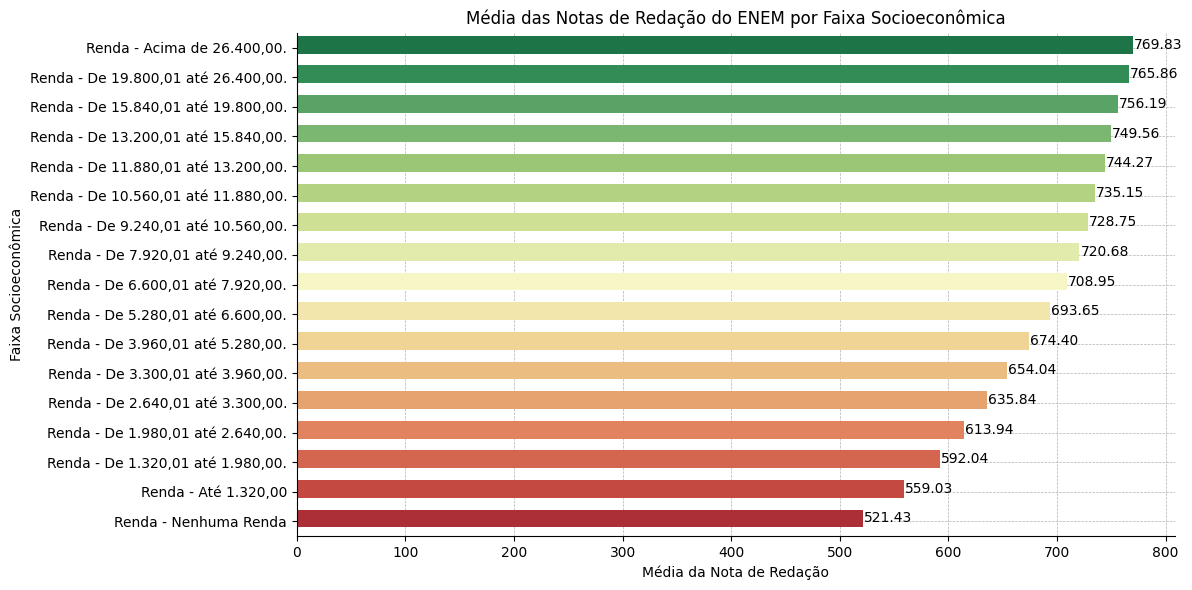

In [45]:
plot_mean_scores(data, 'NU_NOTA_REDACAO', 'Média da Nota de Redação', 'Faixa Socioeconômica', 'Média das Notas de Redação do ENEM por Faixa Socioeconômica')

### Análise das Médias das Notas por Faixa Socioeconômica:

**Médias Mais Altas**:
   - A faixa de renda mais alta (Acima de R$ 26.400,00) tem a maior média de notas em todas as áreas de conhecimento e redação. Isso sugere uma correlação positiva entre renda e desempenho acadêmico.
   - Outras faixas de renda alta também têm médias elevadas, como de R$ 19.800,01 até R$ 26.400,00.

**Médias Intermediárias**:
   - Faixas de renda intermediária, como de R$ 10.560,01 até R$ 11.880,00 (633.09) e de R$ 9.240,01 até R$ 10.560,00 (624.67), apresentam médias intermediárias.

**Médias Mais Baixas**:
   - Faixas de renda mais baixa, como até R$ 1.320,00 (476.80) e sem renda (454.86), apresentam as menores médias de notas.
   - Outras faixas de baixa renda, como de R$ 1.320,01 até R$ 1.980,00 (510.45), também têm médias relativamente baixas.

### Implicações e Considerações:

**Desigualdade Socioeconômica**:
   - O gráfico revela uma correlação clara entre a renda familiar e o desempenho no ENEM. Estudantes de famílias com maior renda tendem a ter médias de notas mais altas.

**Fatores Contribuintes**:
   - Diversos fatores podem contribuir para essas diferenças, incluindo acesso a melhores recursos educacionais, maior qualidade das escolas frequentadas, acesso a aulas particulares e materiais de estudo, ambiente familiar propício aos estudos, entre outros.

# Avaliando as notas de acordo com o estado dos participantes

In [46]:
def plot_state_average_scores(data, score_column, state_column, title):
    """
    Plota as médias das notas por estado num mapa do Brasil.

    Args:
    data (DataFrame): DataFrame contendo os dados das notas.
    score_column (str): Coluna que contém as notas.
    state_column (str): Coluna que contém as siglas dos estados.
    title (str): Título do gráfico.
    """
    # Carregar o shapefile do Brasil
    brazil = gpd.read_file('BR_UF_2022/BR_UF_2022.shp')

    # Agrupar os dados por estado e calcular a média das notas
    average_scores_by_state = data.groupby(state_column)[score_column].mean().reset_index()

    # Mesclar o dataframe geopandas com as médias das notas
    brazil_scores = brazil.merge(average_scores_by_state, left_on='SIGLA_UF', right_on=state_column)

    # Ordenar os dataframes pela média das notas
    brazil_scores = brazil_scores.sort_values(by=score_column, ascending=False)

    # Plotar as médias das notas
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    brazil_scores.boundary.plot(ax=ax, linewidth=0.5, color='black')  # Linhas mais finas
    brazil_scores.plot(column=score_column, cmap='RdYlGn', linewidth=0.1, ax=ax, edgecolor='0.8', legend=False)

    # Adicionar as médias das notas como texto sobre os estados
    for idx, row in brazil_scores.iterrows():
        x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
        if row['SIGLA_UF'] == 'DF':
            y += 0.5  # Ajuste vertical para o DF
        text = plt.annotate(text=f"{row['SIGLA_UF']} - {row[score_column]:.0f}", xy=(x, y),
                            horizontalalignment='center', verticalalignment='center', color='white', fontsize=10)
        text.set_path_effects([patheffects.withStroke(linewidth=3, foreground='black')])

    ax.set_title(title, fontsize=20, fontweight='bold')
    ax.axis('off')

    plt.tight_layout()
    plt.show()

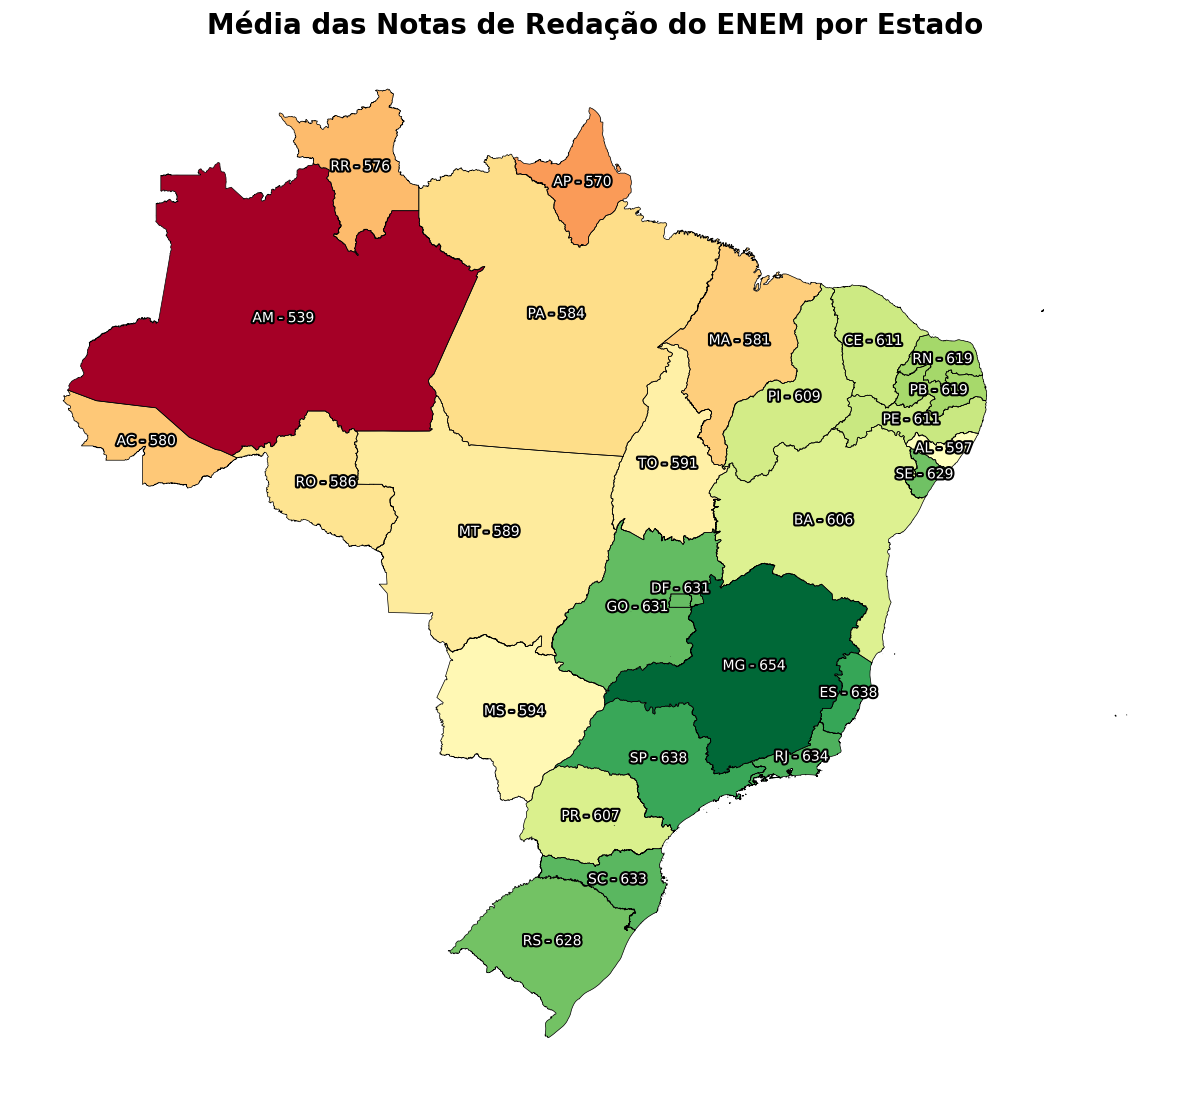

In [47]:
plot_state_average_scores(data, 'NU_NOTA_REDACAO', 'SG_UF_PROVA', 'Média das Notas de Redação do ENEM por Estado')

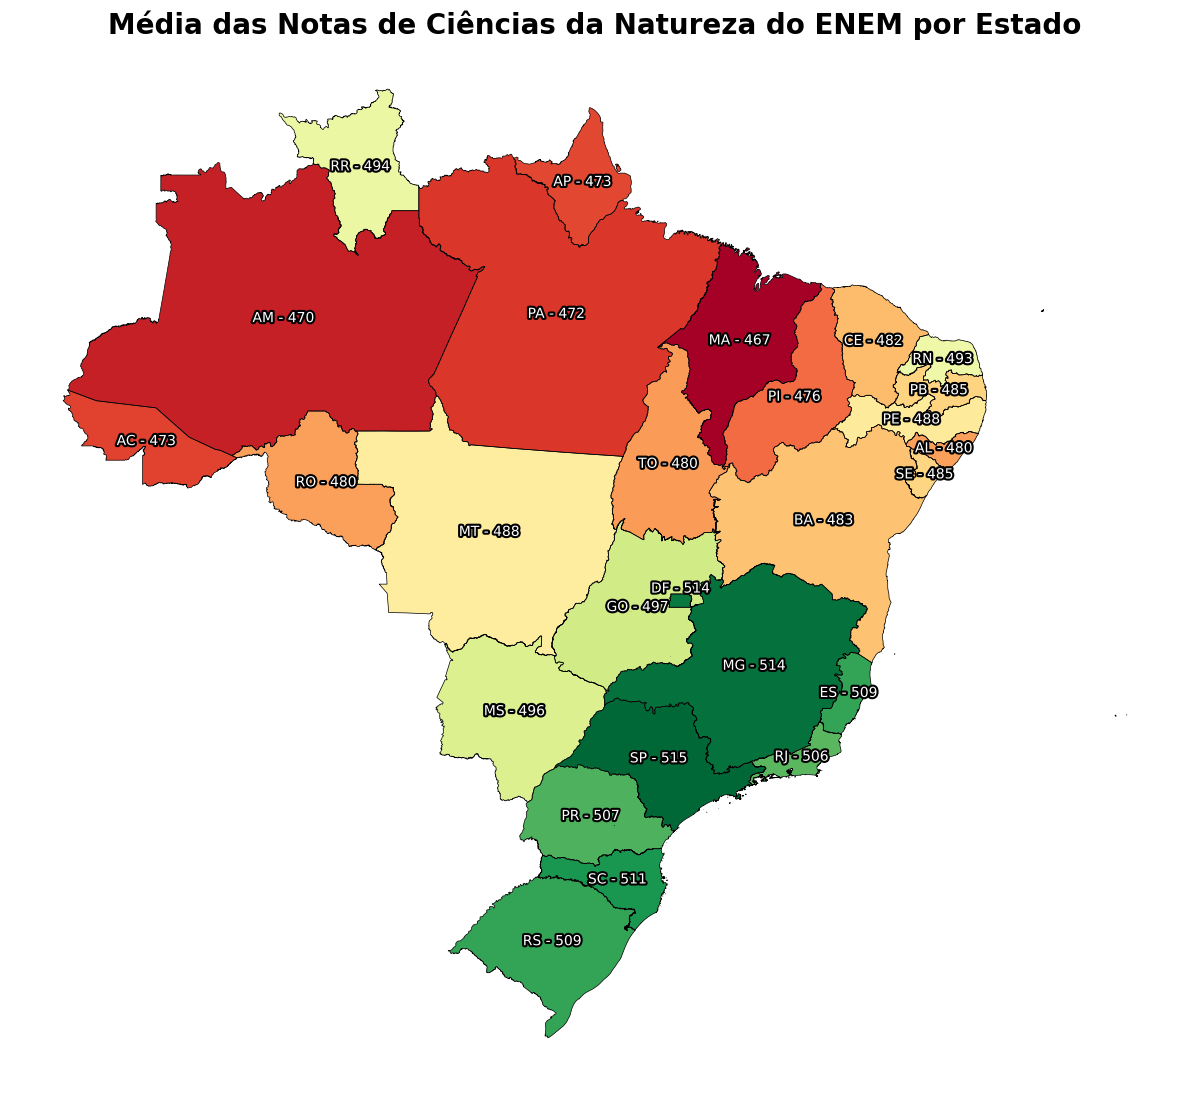

In [48]:
plot_state_average_scores(data, 'NU_NOTA_CN', 'SG_UF_PROVA', 'Média das Notas de Ciências da Natureza do ENEM por Estado')

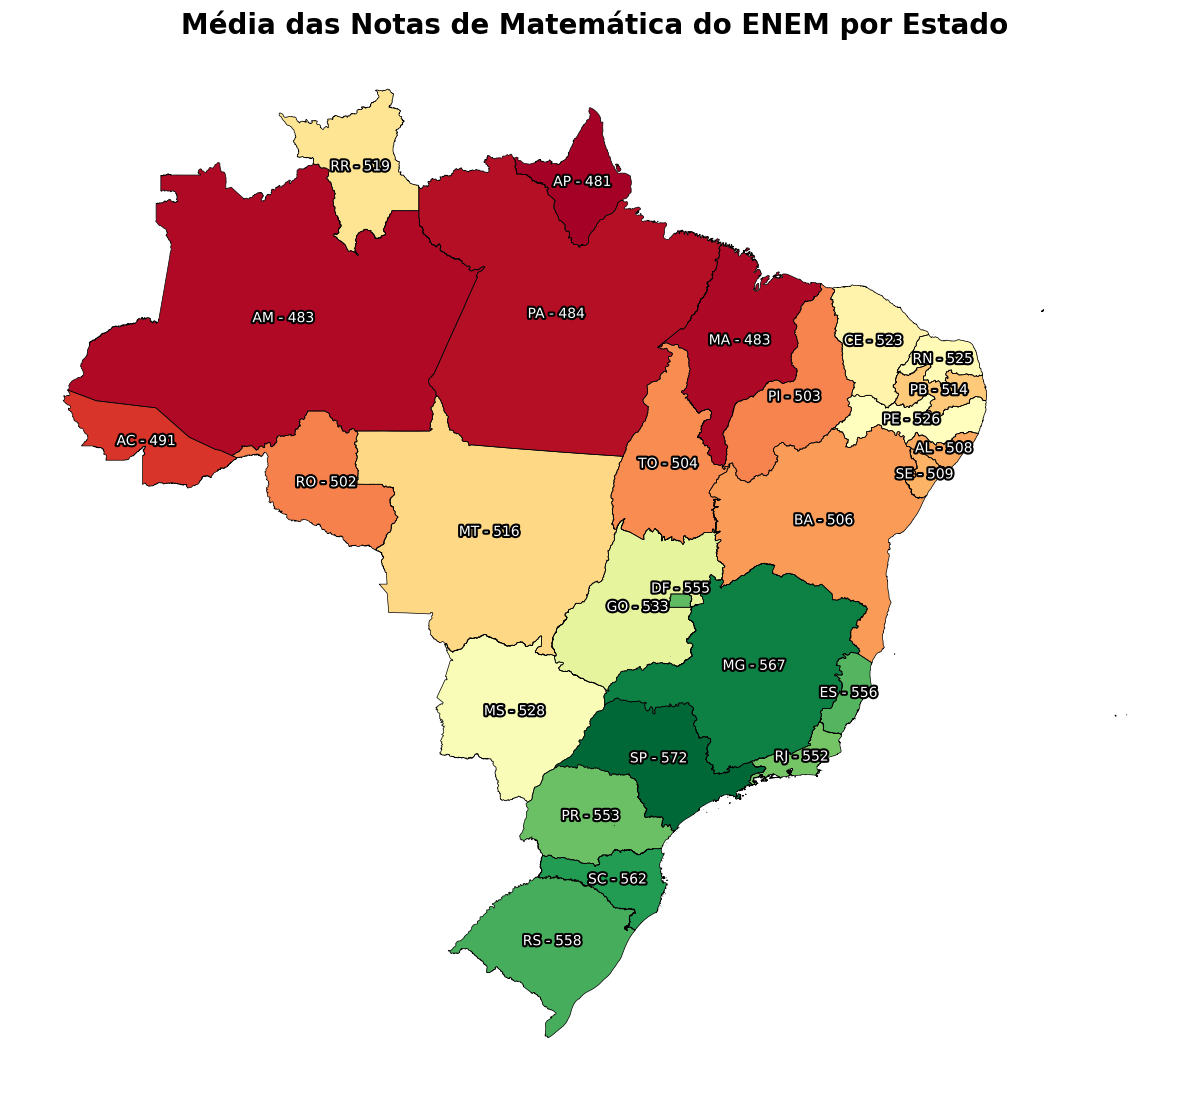

In [49]:
plot_state_average_scores(data, 'NU_NOTA_MT', 'SG_UF_PROVA', 'Média das Notas de Matemática do ENEM por Estado')

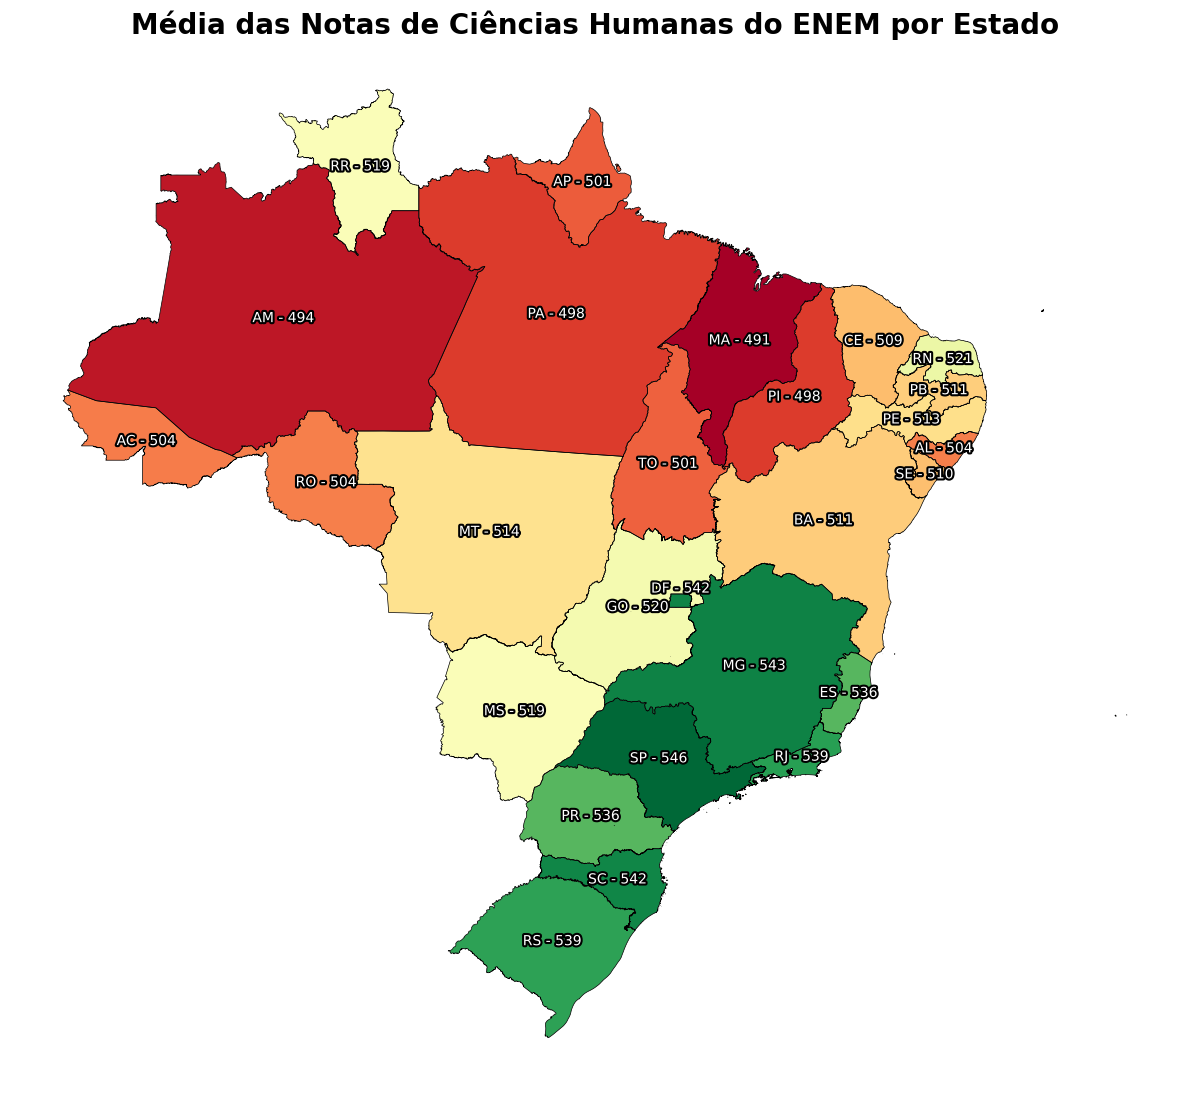

In [50]:
plot_state_average_scores(data, 'NU_NOTA_CH', 'SG_UF_PROVA', 'Média das Notas de Ciências Humanas do ENEM por Estado')

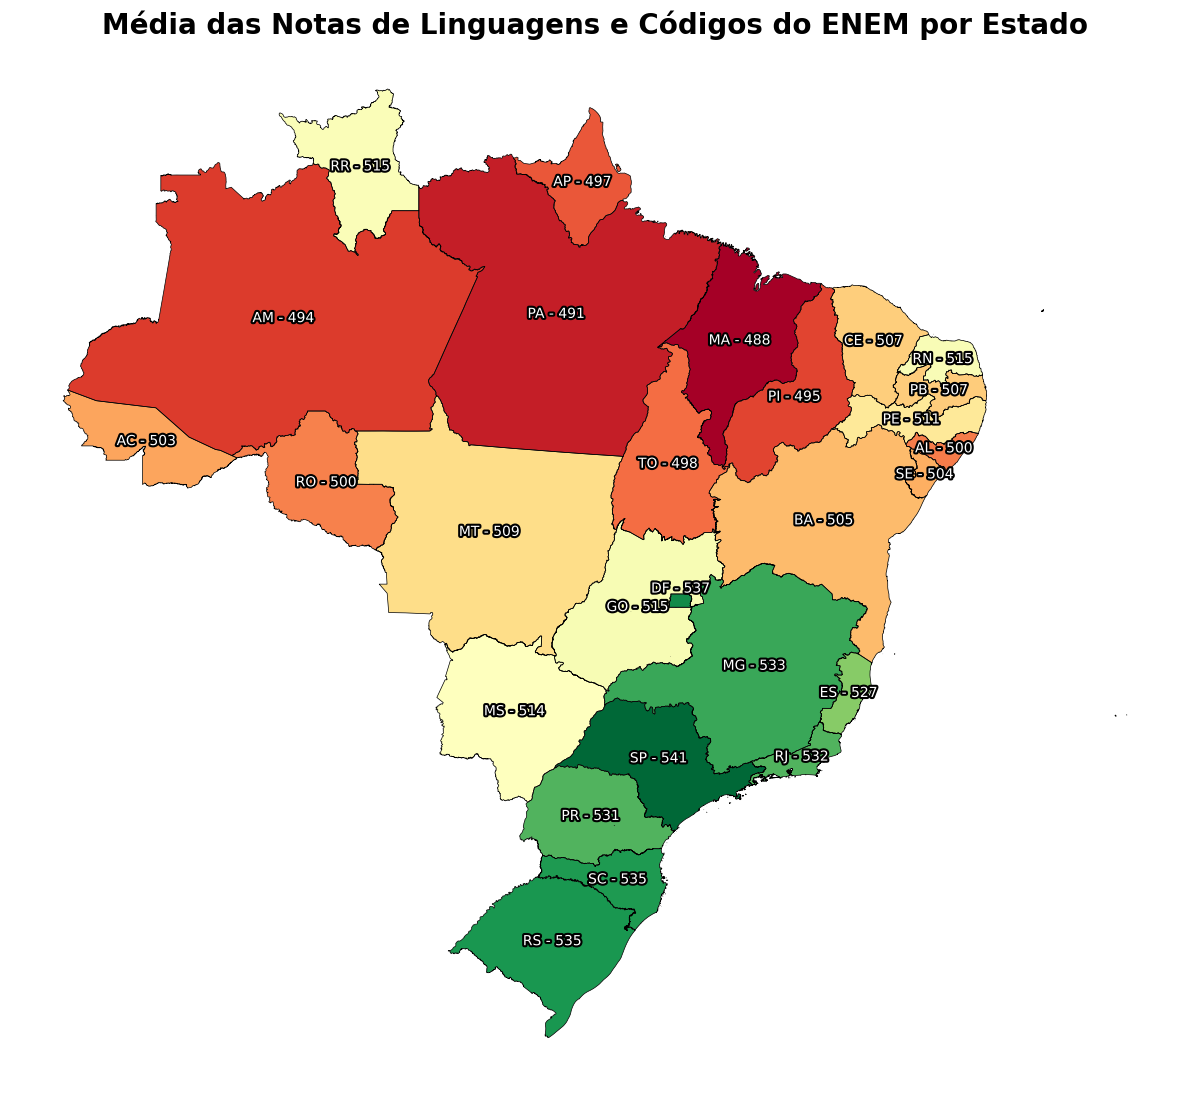

In [51]:
plot_state_average_scores(data, 'NU_NOTA_LC', 'SG_UF_PROVA', 'Média das Notas de Linguagens e Códigos do ENEM por Estado')

### Implicações e Considerações:

**Desigualdade Regional**:
   - Os mapas revelam desigualdades significativas nas médias de notas entre os diferentes estados. Estados do Sudeste e Sul tendem a ter médias mais altas comparadas aos estados do Norte e Nordeste. Enquanto a região centro-oeste apresenta médias intermediárias.

**Fatores Contribuintes**:
   - Diversos fatores podem contribuir para essas diferenças, incluindo qualidade da educação, infraestrutura escolar, acesso a recursos educacionais, níveis socioeconômicos, políticas públicas educacionais e investimento em educação.

# Avaliando a importância das features nas notas

In [52]:
def evaluate_performance_classification(X, y, features, score_threshold=700, n_estimators=100,max_depth = 25, random_state=42):
    # Remover linhas com NaN em y
    X = X[y.notna()]
    y = y[y.notna()]
    
    # Dividir os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Converter y_train em variável binária com base no limiar
    y_train_binary = (y_train >= score_threshold).astype(int)
    y_test_binary = (y_test >= score_threshold).astype(int)

    # One hot encoding para as colunas categóricas
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    encoded_X_train = encoder.fit_transform(X_train[features])
    encoded_X_test = encoder.transform(X_test[features])

    # Criar DataFrames com as features codificadas
    encoded_df_train = pd.DataFrame(encoded_X_train, columns=encoder.get_feature_names_out(features))
    encoded_df_test = pd.DataFrame(encoded_X_test, columns=encoder.get_feature_names_out(features))

    # Criar e treinar o modelo de classificação
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=random_state)
    model.fit(encoded_df_train, y_train_binary)

    # Previsões
    y_pred = model.predict(encoded_df_test)

    # Métricas de desempenho: porcentagem de acertos (accuracy)
    accuracy = accuracy_score(y_test_binary, y_pred)

    # Acurácia no treino
    train_accuracy = model.score(encoded_df_train, y_train_binary)

    # Avaliar a importância das features
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': encoded_df_train.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    return feature_importance_df, accuracy, train_accuracy
# Lista de features selecionadas
categorical_features = ['TP_SEXO', 'SG_UF_PROVA', 'Q001', 'Q002', 'Q006', 'Q022', 'Q024', 'Q025', 'TP_FAIXA_ETARIA', 'TP_ESCOLA', 'TP_COR_RACA']

# Separar features e target
X = data[categorical_features]
y = data['NU_NOTA_REDACAO'] 

# Executar a função
feature_importance_df, accuracy, train_accuracy = evaluate_performance_classification(X, y, categorical_features, score_threshold=900)
print("Acurácia nos dados de teste:", accuracy)
print("Acurácia nos dados de treino:", train_accuracy)

Acurácia nos dados de teste: 0.8984835145758677
Acurácia nos dados de treino: 0.9062119981542118


In [53]:
# Mapeamento para Cor ou Raça
cor_raca_map = {
    0: 'Cor/Raça - Não declarado',
    1: 'Cor/Raça - Branca',
    2: 'Cor/Raça - Preta',
    3: 'Cor/Raça - Parda',
    4: 'Cor/Raça - Amarela',
    5: 'Cor/Raça - Indígena',
    6: 'Cor/Raça - Não dispõe da informação'
}

# Mapeamento para Tipo de Escola
tipo_escola_map = {
    1: 'Escola - Não Respondeu',
    2: 'Escola - Pública',
    3: 'Escola - Privada'
}

# Mapeamento para Faixa Etária
faixa_etaria_map = {
    1: 'Idade - Menor de 17 anos',
    2: 'Idade - 17 anos',
    3: 'Idade - 18 anos',
    4: 'Idade - 19 anos',
    5: 'Idade - 20 anos',
    6: 'Idade - 21 anos',
    7: 'Idade - 22 anos',
    8: 'Idade - 23 anos',
    9: 'Idade - 24 anos',
    10: 'Idade - 25 anos',
    11: 'Idade - Entre 26 e 30 anos',
    12: 'Idade - Entre 31 e 35 anos',
    13: 'Idade - Entre 36 e 40 anos',
    14: 'Idade - Entre 41 e 45 anos',
    15: 'Idade - Entre 46 e 50 anos',
    16: 'Idade - Entre 51 e 55 anos',
    17: 'Idade - Entre 56 e 60 anos',
    18: 'Idade - Entre 61 e 65 anos',
    19: 'Idade - Entre 66 e 70 anos',
    20: 'Idade - Maior de 70 anos'
}

# Mapeamento sexo
sexo_map = {
    'F': 'Sexo - Feminino',
    'M': 'Sexo - Masculino'
}

# Mapeamento para as questões Q001, Q002, etc.
description_mapping = {
    'Q001': {
        'A': 'Pai - Nunca estudou',
        'B': 'Pai - Não completou a 4ª série/5º ano do Ensino Fundamental',
        'C': 'Pai - Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
        'D': 'Pai - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
        'E': 'Pai - Completou o Ensino Médio, mas não completou a Faculdade',
        'F': 'Pai - Completou a Faculdade, mas não completou a Pós-graduação',
        'G': 'Pai - Completou a Pós-graduação',
        'H': 'Pai - Não sei'
    },
    'Q002': {
        'A': 'Mãe - Nunca estudou',
        'B': 'Mãe - Não completou a 4ª série/5º ano do Ensino Fundamental',
        'C': 'Mãe - Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
        'D': 'Mãe - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
        'E': 'Mãe - Completou o Ensino Médio, mas não completou a Faculdade',
        'F': 'Mãe - Completou a Faculdade, mas não completou a Pós-graduação',
        'G': 'Mãe - Completou a Pós-graduação',
        'H': 'Mãe - Não sei'
    },
    'Q006': {
        'A' : 'Renda - Nenhuma Renda',
		'B'	: 'Renda - Até 1.320,00',
		'C'	: 'Renda - De 1.320,01 até 1.980,00.',
		'D'	: 'Renda - De 1.980,01 até 2.640,00.',
		'E'	: 'Renda - De 2.640,01 até 3.300,00.',
		'F'	: 'Renda - De 3.300,01 até 3.960,00.',
		'G'	: 'Renda - De 3.960,01 até 5.280,00.',
		'H'	: 'Renda - De 5.280,01 até 6.600,00.',
		'I'	: 'Renda - De 6.600,01 até 7.920,00.',
		'J'	: 'Renda - De 7.920,01 até 9240,00.',
		'K'	: 'Renda - De 9.240,01 até 10.560,00.',
		'L'	: 'Renda - De 10.560,01 até 11.880,00.',
		'M'	: 'Renda - De 11.880,01 até 13.200,00.',
		'N'	: 'Renda - De 13.200,01 até 15.840,00.',
		'O'	: 'Renda - De 15.840,01 até19.800,00.',
		'P'	:'Renda - De 19.800,01 até 26.400,00.',
		'Q'	: 'Renda - Acima de 26.400,00.'
    },
    'Q022': {
        'A': 'Celular - Não',
        'B': 'Celular - Sim, um',
        'C': 'Celular - Sim, dois',
        'D': 'Celular - Sim, três',
        'E': 'Celular - Sim, quatro ou mais'
    },
    'Q024': {
        'A': 'Computador - Não',
        'B': 'Computador - Sim, um',
        'C': 'Computador - Sim, dois',
        'D': 'Computador - Sim, três',
        'E': 'Computador - Sim, quatro ou mais'
    },
    'Q025': {
        'A': 'Internet - Não',
        'B': 'Internet - Sim'
    }
}

In [54]:
def map_feature_names(feature_name, sexo_map, cor_raca_map, tipo_escola_map, faixa_etaria_map, description_mapping):
    if feature_name.startswith('TP_SEXO') or feature_name == 'SEXO':
        return sexo_map.get(feature_name.split('_')[-1], 'Desconhecido')

    for prefix, mapping in [('TP_COR_RACA', cor_raca_map), ('TP_ESCOLA', tipo_escola_map)]:
        if feature_name.startswith(prefix):
            code = int(feature_name.split('_')[-1])
            return mapping.get(code, 'Desconhecido')

    if feature_name.startswith('TP_FAIXA_ETARIA'):
        code = int(feature_name.split('_')[-1])
        return faixa_etaria_map.get(code, 'Desconhecido')

    parts = feature_name.split('_')
    if parts[0] in description_mapping:
        return description_mapping[parts[0]].get(parts[1], 'Desconhecido')

    return feature_name

def plot_feature_importance(feature_importance_df, title):
    # Mapeamento dos nomes das características
    feature_importance_df['Mapped Feature'] = feature_importance_df['Feature'].apply(
        lambda x: map_feature_names(x, sexo_map, cor_raca_map, tipo_escola_map, faixa_etaria_map, description_mapping)
    )

    # Ordenar as features por importância
    sorted_df = feature_importance_df.sort_values('Importance', ascending=False)

    # Criar uma paleta de cores que transita de verde para vermelho
    pal = sns.color_palette("RdYlGn_r", len(sorted_df.head(10)))

    # Criar o gráfico de barras, aplicando a paleta de cores
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Mapped Feature', data=sorted_df.head(10), palette=pal, hue='Mapped Feature', dodge=False)

    # Adicionar títulos e labels
    plt.title(title, fontsize=15)
    plt.xlabel('Importance')
    plt.ylabel('Features')

    plt.show()

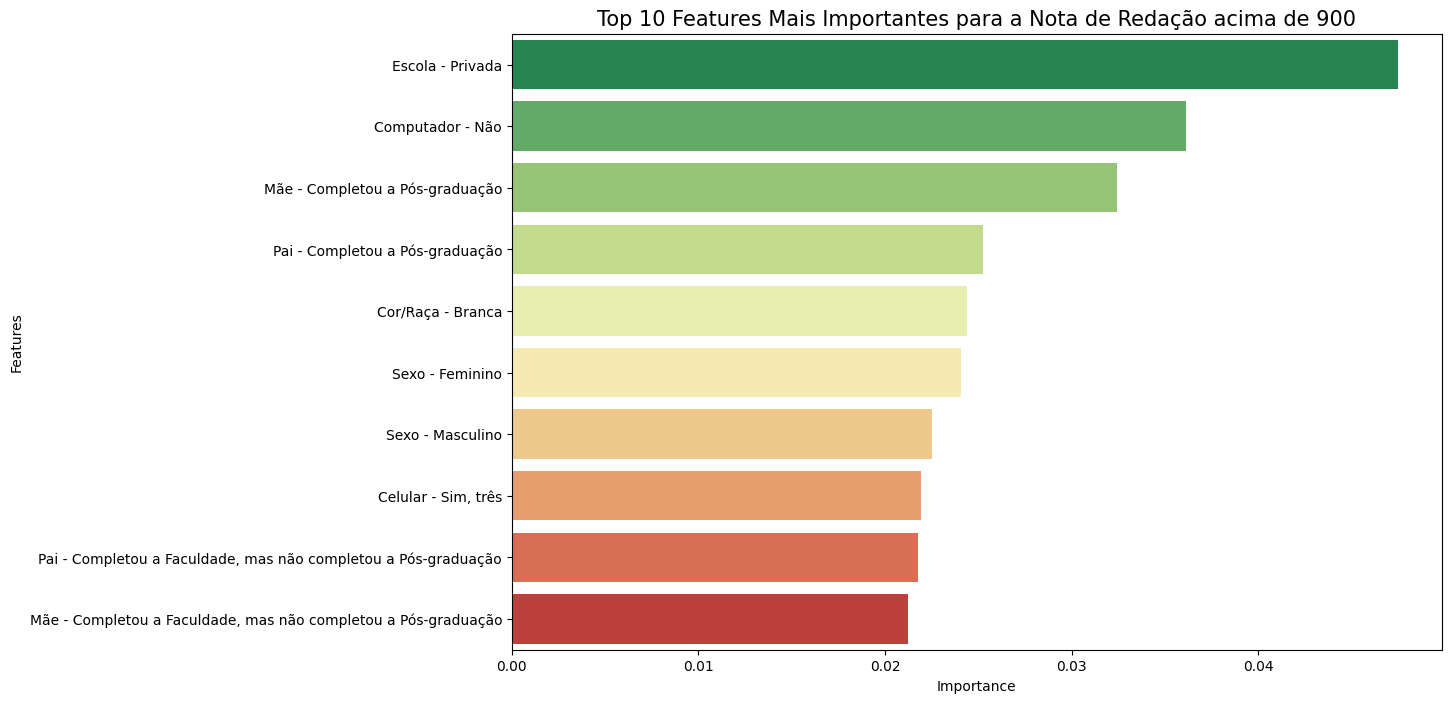

In [55]:
plot_feature_importance(feature_importance_df, 'Top 10 Features Mais Importantes para a Nota de Redação acima de 900')

A análise de feature importance em modelos de machine learning, como o Random Forest, identifica quais features (variáveis) mais contribuem para as decisões do modelo, mas não necessariamente explica a direção (positiva ou negativa) dessas contribuições. Quando a feature aparece como a mais importante, isso indica que a presença ou ausência dela tem um impacto significativo no desempenho dos alunos, mas não especifica se essa ausência melhora ou piora o desempenho.

In [56]:
# Filtra apenas os participantes com notas na redação
data_new = data[data['NU_NOTA_REDACAO'] >= 0].copy()

# Cria uma nova coluna para classificar as notas
data_new.loc[:, 'CLASSIFICACAO_NOTA'] = data_new['NU_NOTA_REDACAO'].apply(lambda x: 'Abaixo de 900' if x < 900 else 'Acima ou igual a 900')

# Agrupa os dados por tipo de escola e classificação de nota
grouped_data = data_new.groupby(['Tipo_Escola_Desc', 'CLASSIFICACAO_NOTA']).size().unstack(fill_value=0)

# Calcula a porcentagem
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Mostra a tabela final
grouped_data_percentage

CLASSIFICACAO_NOTA,Abaixo de 900,Acima ou igual a 900
Tipo_Escola_Desc,,
Não Respondeu,89.922584,10.077416
Privada,74.360583,25.639417
Pública,93.439464,6.560536


A porcentagem de inscritos com notas acima ou igual a 900 é maior para os que são de escola privada sendo 25.63% do total, já para os de escola pública é de 6.56% portanto a feature escola privada tem contribuição positiva para a nota.

In [57]:
# Agrupa os dados por tipo de escola e classificação de nota
grouped_data = data_new.groupby(['Q024_Desc', 'CLASSIFICACAO_NOTA']).size().unstack(fill_value=0)

# Calcula a porcentagem
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Mostra a tabela final
grouped_data_percentage

CLASSIFICACAO_NOTA,Abaixo de 900,Acima ou igual a 900
Q024_Desc,,
Computador - Não,94.337157,5.662843
"Computador - Sim, dois",81.066976,18.933024
"Computador - Sim, quatro ou mais",75.114004,24.885996
"Computador - Sim, três",76.970605,23.029395
"Computador - Sim, um",88.187466,11.812534


Já na feature "Computador - Não" podemos ver que a porcentagem de inscritos com notas acima ou igual a 900 é de apenas 5.66% ou seja tem contribuição negativa para a nota.

In [58]:
# Agrupa os dados por tipo de escola e classificação de nota
grouped_data = data_new.groupby(['Q002_Desc', 'CLASSIFICACAO_NOTA']).size().unstack(fill_value=0)

# Calcula a porcentagem
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Mostra a tabela final
grouped_data_percentage

CLASSIFICACAO_NOTA,Abaixo de 900,Acima ou igual a 900
Q002_Desc,,
"Mãe - Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",94.533578,5.466422
"Mãe - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",93.520905,6.479095
"Mãe - Completou a Faculdade, mas não completou a Pós-graduação",82.981576,17.018424
Mãe - Completou a Pós-graduação,79.970215,20.029785
"Mãe - Completou o Ensino Médio, mas não completou a Faculdade",90.616179,9.383821
Mãe - Nunca estudou,97.269888,2.730112
Mãe - Não completou a 4ª série/5º ano do Ensino Fundamental,95.875782,4.124218
Mãe - Não sei,96.034474,3.965526


Para a feature escolaridade da mãe temos que a porcentagem de inscritos que tirou nota igual ou acima de 900 é muito maior quando "Mãe - Completou a Pós-graduação", sendo assim é uma contribuição positiva para a nota, e de maior importância do que as outras.

# Avaliando a importância das features na presença nas provas

In [60]:
def train_and_evaluate_rf(X, y, features, n_estimators=50, max_depth = 20,  test_size=0.2, random_state=42):
    # Dividir os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # One hot encoding para as colunas categóricas
    encoder_ = OneHotEncoder(sparse=False, handle_unknown='ignore')
    encoded_X_train = encoder_.fit_transform(X_train[features])
    encoded_X_test = encoder_.transform(X_test[features])

    # Criar um DataFrame com as features codificadas
    encoded_df_train = pd.DataFrame(encoded_X_train, columns=encoder_.get_feature_names_out(features))
    encoded_df_test = pd.DataFrame(encoded_X_test, columns=encoder_.get_feature_names_out(features))

    # Criar e treinar o modelo RandomForest
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth,  random_state=random_state)
    rf.fit(encoded_df_train, y_train)

    # Avaliar o desempenho do modelo nos dados de treini
    y_pred = rf.predict(encoded_df_train)
    accuracy = accuracy_score(y_train, y_pred)

    # Avaliar o desempenho do modelo nos dados de teste
    y_pred = rf.predict(encoded_df_test)
    accuracy_pred = accuracy_score(y_test, y_pred)

    # Avaliar a importância das features
    importances = rf.feature_importances_
    feature_importances = pd.DataFrame({'Feature': encoded_df_train.columns, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    
    return feature_importances, accuracy_pred, accuracy

# Lista de features selecionadas
features = ["IN_TREINEIRO","TP_FAIXA_ETARIA", "TP_SEXO", "TP_COR_RACA", "TP_ESCOLA", "SG_UF_PROVA", "Q001", "Q002", "Q006", "Q022", "Q024", "Q025"]

# Filtrar dados para remover casos onde TP_PRESENCA_CN == 2
filtered_data = data[data['TP_PRESENCA_CN'] != 2].copy()

# Separar features e target após filtragem
X = filtered_data[features]
y = filtered_data['TP_PRESENCA_CN']


# Executar a função
feature_importances, accuracy_pred, accuracy = train_and_evaluate_rf(X, y, features)
print("Acurácia no teste:", accuracy_pred)
print("Acurácia no treino:", accuracy)

Acurácia no teste: 0.7012802203601709
Acurácia no treino: 0.7184146087898686


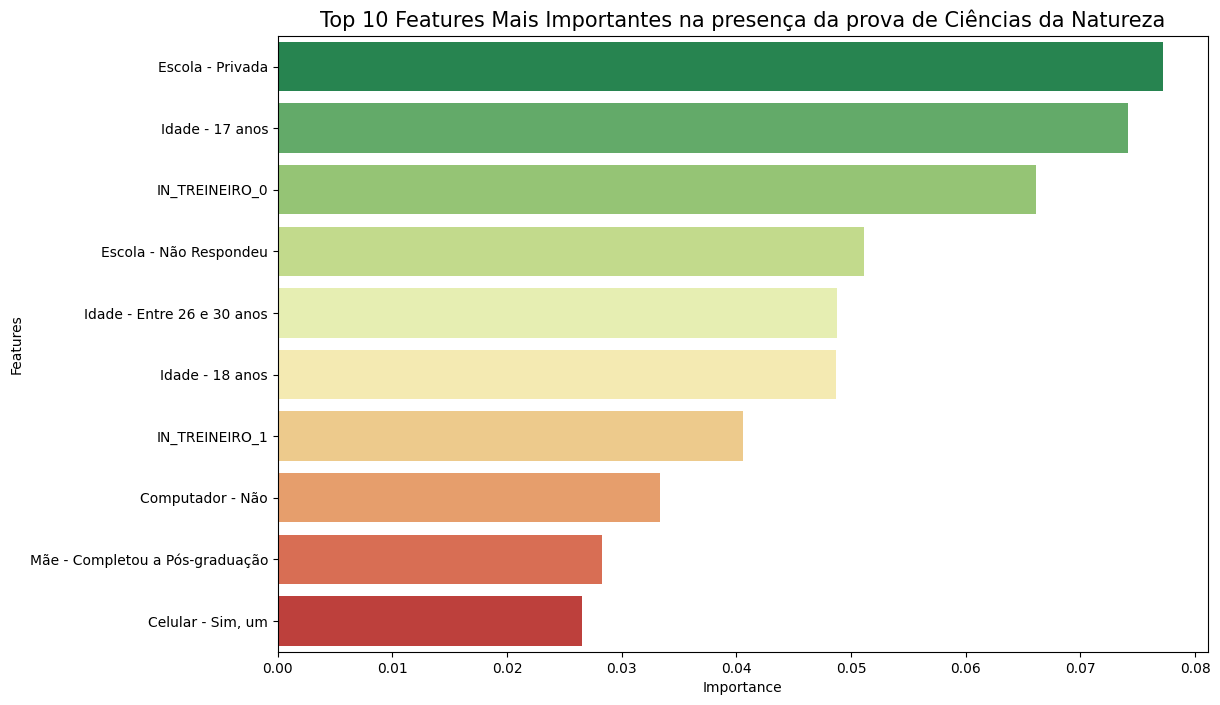

In [61]:
plot_feature_importance(feature_importances, 'Top 10 Features Mais Importantes na presença da prova de Ciências da Natureza')

In [62]:
# Filtra apenas os participantes que não foram eliminados e cria uma cópia segura para evitar futuros avisos
data_new = data[data['TP_PRESENCA_CN'] != 2].copy()

# Cria uma nova coluna para classificar a presença
data_new.loc[:, 'CLASSIFICACAO_PRESENCA'] = data_new['TP_PRESENCA_CN'].apply(lambda x: 'Presente' if x == 1 else 'Faltou')

# Agrupa os dados por tipo de escola e classificação de presença
grouped_data = data_new.groupby(['Tipo_Escola_Desc', 'CLASSIFICACAO_PRESENCA']).size().unstack(fill_value=0)

# Calcula a porcentagem
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Mostra a tabela final
grouped_data_percentage

CLASSIFICACAO_PRESENCA,Faltou,Presente
Tipo_Escola_Desc,,
Não Respondeu,35.321048,64.678952
Privada,5.458306,94.541694
Pública,28.511594,71.488406


A porcentagem de inscritos que faltam e são de escola pública é muito maior do que os de escola privada, sendo 28.5% e 5.45% respectivamente, portanto a feature tipo de escola - privada tem uma contribuição positiva para a presença nas provas.

In [63]:
# Agrupa os dados por tipo de escola e classificação de presença
grouped_data = data_new.groupby(['Faixa_Etaria_Desc', 'CLASSIFICACAO_PRESENCA']).size().unstack(fill_value=0)

# Calcula a porcentagem
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Mostra a tabela final
grouped_data_percentage

CLASSIFICACAO_PRESENCA,Faltou,Presente
Faixa_Etaria_Desc,,
17 anos,17.131214,82.868786
18 anos,24.211769,75.788231
19 anos,31.974500,68.025500
20 anos,36.385510,63.614490
21 anos,40.448991,59.551009
22 anos,43.334083,56.665917
23 anos,46.354274,53.645726
24 anos,48.670434,51.329566
25 anos,50.379026,49.620974


Tanto para a faixa etaria de 17 anos quanto para menor de 17, temos que a porcentagem de presença é a maior dentre as faixas etárias, portanto essa feature tem contribuição positiva na presença nas provas.

In [64]:
# Agrupa os dados por tipo de escola e classificação de presença
grouped_data = data_new.groupby(['IN_TREINEIRO', 'CLASSIFICACAO_PRESENCA']).size().unstack(fill_value=0)

# Calcula a porcentagem
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Mostra a tabela final
grouped_data_percentage

CLASSIFICACAO_PRESENCA,Faltou,Presente
IN_TREINEIRO,,
0,34.315453,65.684547
1,16.584099,83.415901


Os inscritos que são treineiros tem uma maior taxa de presença nas provas, portanto a feture IN_TREINEIRO_0 tem uma contribuição negativa na presença nas provas. Ou seja, os não treineiros tem uma maior taxa de faltas.

# Otimizando o dataset para usar no power bi

In [65]:
data.isnull().sum()

NU_INSCRICAO                0
NU_ANO                      0
TP_FAIXA_ETARIA             0
TP_SEXO                     0
TP_ESTADO_CIVIL             0
TP_COR_RACA                 0
TP_NACIONALIDADE            0
TP_ESCOLA                   0
IN_TREINEIRO                0
CO_MUNICIPIO_PROVA          0
NO_MUNICIPIO_PROVA          0
CO_UF_PROVA                 0
SG_UF_PROVA                 0
TP_PRESENCA_CN              0
TP_PRESENCA_CH              0
TP_PRESENCA_LC              0
TP_PRESENCA_MT              0
CO_PROVA_CN           1241528
CO_PROVA_CH           1111312
CO_PROVA_LC           1111312
CO_PROVA_MT           1241528
NU_NOTA_CN            1241528
NU_NOTA_CH            1111312
NU_NOTA_LC            1111312
NU_NOTA_MT            1241528
TX_RESPOSTAS_CN       1241528
TX_RESPOSTAS_CH       1111312
TX_RESPOSTAS_LC       1111312
TX_RESPOSTAS_MT       1241528
TP_LINGUA                   0
TX_GABARITO_CN        1241528
TX_GABARITO_CH        1111312
TX_GABARITO_LC        1111312
TX_GABARIT

In [66]:
# Dropar colunas desnessárias
data = data.drop(columns=['Prova_CN_Desc','Prova_CH_Desc','Prova_LC_Desc','Prova_MT_Desc','NU_NOTA_COMP1',
                          'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','TX_GABARITO_CN','TX_GABARITO_CH',
                          'TX_GABARITO_LC','TX_GABARITO_MT','TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT',
                          'CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT','NU_ANO','CO_MUNICIPIO_PROVA',
                          'NO_MUNICIPIO_PROVA','CO_UF_PROVA','Q003','Q004','Q005','Q007','Q008','Q009','Q010','Q011','Q012','Q013',
                          'Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023','TP_NACIONALIDADE'])

In [67]:
data.isnull().sum()

NU_INSCRICAO               0
TP_FAIXA_ETARIA            0
TP_SEXO                    0
TP_ESTADO_CIVIL            0
TP_COR_RACA                0
TP_ESCOLA                  0
IN_TREINEIRO               0
SG_UF_PROVA                0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NU_NOTA_CN           1241528
NU_NOTA_CH           1111312
NU_NOTA_LC           1111312
NU_NOTA_MT           1241528
TP_LINGUA                  0
TP_STATUS_REDACAO    1111312
NU_NOTA_REDACAO      1111312
Q001                       0
Q002                       0
Q006                       0
Q024                       0
Q025                       0
Faixa_Etaria_Desc          0
Cor_Raca_Desc              0
Tipo_Escola_Desc           0
Q001_Desc                  0
Q002_Desc                  0
Q006_Desc                  0
Q024_Desc                  0
Q025_Desc                  0
dtype: int64

In [68]:
# Se TP_PRESENCA for 0 verificar o NaN em NU_NOTA e substituir por 0
data.loc[(data['TP_PRESENCA_CN'] == 0) & (data['NU_NOTA_CN'].isnull()), 'NU_NOTA_CN'] = 0
data.loc[(data['TP_PRESENCA_CH'] == 0) & (data['NU_NOTA_CH'].isnull()), 'NU_NOTA_CH'] = 0
data.loc[(data['TP_PRESENCA_LC'] == 0) & (data['NU_NOTA_LC'].isnull()), 'NU_NOTA_LC'] = 0
data.loc[(data['TP_PRESENCA_MT'] == 0) & (data['NU_NOTA_MT'].isnull()), 'NU_NOTA_MT'] = 0
data['NU_NOTA_REDACAO'] = data['NU_NOTA_REDACAO'].fillna(0)

In [69]:
# Dicionário de mapeamento para TP_PRESENCA_CN
tp_presenca_cn_map = {
    0: 'Faltou à prova',
    1: 'Presente na prova',
    2: 'Eliminado na prova'
}

data['TP_PRESENCA_CN'] = data['TP_PRESENCA_CN'].map(tp_presenca_cn_map)
data['TP_PRESENCA_CH'] = data['TP_PRESENCA_CH'].map(tp_presenca_cn_map)
data['TP_PRESENCA_LC'] = data['TP_PRESENCA_LC'].map(tp_presenca_cn_map)
data['TP_PRESENCA_MT'] = data['TP_PRESENCA_MT'].map(tp_presenca_cn_map)


In [70]:
data['TP_STATUS_REDACAO'] = data['TP_STATUS_REDACAO'].fillna(0)

# Dicionário de mapeamento para TP_STATUS_REDACAO
redacao_status_map = {
    0: 'Faltou à prova',
    1: 'Sem problemas',
    2: 'Anulada',
    3: 'Cópia Texto Motivador',
    4: 'Em Branco',
    6: 'Fuga ao tema',
    7: 'Não atendimento ao tipo textual',
    8: 'Texto insuficiente',
    9: 'Parte desconectada'
}

data['Status_Redacao_Desc'] = data['TP_STATUS_REDACAO'].map(redacao_status_map)

In [71]:
# Dicionário de mapeamento para TP_LINGUA
lingua_map = {
    0: 'Inglês',
    1: 'Espanhol'
}

data['Lingua_Desc'] = data['TP_LINGUA'].map(lingua_map)

In [72]:
data.isnull().sum()

NU_INSCRICAO              0
TP_FAIXA_ETARIA           0
TP_SEXO                   0
TP_ESTADO_CIVIL           0
TP_COR_RACA               0
TP_ESCOLA                 0
IN_TREINEIRO              0
SG_UF_PROVA               0
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
TP_PRESENCA_MT            0
NU_NOTA_CN             2212
NU_NOTA_CH             4598
NU_NOTA_LC             4598
NU_NOTA_MT             2212
TP_LINGUA                 0
TP_STATUS_REDACAO         0
NU_NOTA_REDACAO           0
Q001                      0
Q002                      0
Q006                      0
Q024                      0
Q025                      0
Faixa_Etaria_Desc         0
Cor_Raca_Desc             0
Tipo_Escola_Desc          0
Q001_Desc                 0
Q002_Desc                 0
Q006_Desc                 0
Q024_Desc                 0
Q025_Desc                 0
Status_Redacao_Desc       0
Lingua_Desc               0
dtype: int64

In [73]:
# Dropar desnecessárias
data = data.drop(columns=['Q001','Q002','Q006','Q024','Q025','TP_FAIXA_ETARIA','TP_ESTADO_CIVIL','TP_COR_RACA','TP_ESCOLA','TP_STATUS_REDACAO','TP_LINGUA'])
data = data.dropna()

In [74]:
# salvar em um novo arquivo csv
data.to_csv('enem_2023_tratado.csv', index=False)